<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HZExoplanetsExploration/KeplerConfirmedExoplanets/HZExoplanetsExploration_KeplerConfirmedExoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [270]:
pd.options.mode.copy_on_write = True

In [271]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Miniterran': 'darkred',
    'Subterran': 'red',
    'Terran': 'blue',
    'Superterran': 'deepskyblue',
    'Neptunian': 'powderblue',
    'Jovian': 'wheat'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Miniterran': 'Miniterran',
    'Subterran': 'Subterran (Mars-Sized)',
    'Terran': 'Terran (Earth-Sized)',
    'Superterran': 'Superterran (Super-Earth/Mini-Neptunes)',
    'Neptunian': 'Neptunian (Neptune-Sized)',
    'Jovian': 'Jovian (Jupiter-Sized)'
}

# Create the buckets array
def create_buckets(start, end, interval):
    buckets = []
    value = start
    while value <= end:
        buckets.append(value)
        value += interval
    return buckets

# Plot seleted exoplanets with sizeable circles in propotion to the exoplanets' radii
def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanets data
                                  x_field, # The data field for x axis
                                  y_field, # The data field for y axis
                                  size_field, # The data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Egde color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # The propotion to scale the cirle for the star in the graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

# Plot exoplanets with sizeable circles in propotion to the exoplanets' radii
def plot_exoplanets_with_size(ax, exoplanets_data, x_field, y_field, size_field, type_field, scale_size, edgecolors):
    for exoplanet_type in exoplanet_type_labels:
        plot_selected_exoplanets_with_size(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_type_colors[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_type_labels[exoplanet_type],
                                      scale_size=scale_size)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [272]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/HZExoplanetExploration/KeplerConfirmedExoplanets/KeplerConfirmedExoplanets_2024.06.17.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=98,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
                                          'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_massj', 'pl_massjerr1', 'pl_massjerr2',
                                          'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
                                          'pl_ratdor', 'pl_ratdorerr1', 'pl_ratdorerr2', 'pl_ratror', 'pl_ratrorerr1', 'pl_ratrorerr2',
                                          'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_rad', 'st_raderr1', 'st_raderr2',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_met', 'st_meterr1', 'st_meterr2',
                                          'st_metratio', 'st_lum', 'st_lumerr1', 'st_lumerr2', 'st_logg', 'st_loggerr1', 'st_loggerr2',
                                          'st_age', 'st_ageerr1', 'st_ageerr2', 'st_dens', 'st_denserr1', 'st_denserr2', 'st_vsin',
                                          'st_vsinerr1', 'st_vsinerr2', 'st_rotp', 'st_rotperr1', 'st_rotperr2', 'st_radv', 'st_radverr1',
                                          'st_radverr2', 'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_bmag', 'sy_bmagerr1', 'sy_bmagerr2', 'sy_vmag',
                                          'sy_vmagerr1', 'sy_vmagerr2'],
                                skipfooter=0,
                                engine='python')

In [274]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbpererr1,...,st_radverr2,sy_dist,sy_disterr1,sy_disterr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2
0,2MASS J19383260+4603591 b,2MASS J19383260+4603591,1,2,3,Eclipse Timing Variations,2015,Kepler,406.000000,4.000000,...,NaN,396.332,6.3885,-6.3885,12.112,0.307,-0.307,12.651,0.215,-0.215
1,KIC 10001893 b,KIC 10001893,1,1,3,Orbital Brightness Modulation,2014,Kepler,0.219700,NaN,...,NaN,1672.940,149.7000,-149.7000,15.073,0.109,-0.109,15.829,0.150,-0.150
2,KIC 10001893 c,KIC 10001893,1,1,3,Orbital Brightness Modulation,2014,Kepler,0.325280,NaN,...,NaN,1672.940,149.7000,-149.7000,15.073,0.109,-0.109,15.829,0.150,-0.150
3,KIC 10001893 d,KIC 10001893,1,1,3,Orbital Brightness Modulation,2014,Kepler,0.811610,NaN,...,NaN,1672.940,149.7000,-149.7000,15.073,0.109,-0.109,15.829,0.150,-0.150
4,KIC 10068024 b,KIC 10068024,1,1,1,Orbital Brightness Modulation,2021,Kepler,2.073549,0.000008,...,NaN,721.105,NaN,NaN,13.685,0.087,-0.087,13.144,0.092,-0.092


In [275]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbpererr1,...,st_radverr2,sy_dist,sy_disterr1,sy_disterr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2
2769,Kepler-997 b,Kepler-997,1,1,1,Transit,2016,Kepler,2.707307,0.000006,...,NaN,467.568,5.707,-5.574,12.794,0.312,-0.312,11.521,0.038,-0.038
2770,Kepler-998 b,Kepler-998,1,1,1,Transit,2016,Kepler,5.653777,0.000011,...,NaN,986.364,15.666,-15.197,15.304,0.023,-0.023,14.463,0.080,-0.080
2771,Kepler-999 b,Kepler-999,1,1,1,Transit,2016,Kepler,5.991857,0.000008,...,NaN,545.063,8.197,-7.962,13.045,0.016,-0.016,12.364,0.069,-0.069
2772,PH1 b,PH1,1,4,1,Transit,2012,Kepler,138.317000,0.040000,...,-0.2,1033.160,NaN,NaN,14.932,0.067,-0.067,13.841,0.149,-0.149
2773,PH2 b,PH2,1,1,1,Transit,2013,Kepler,282.525420,0.000110,...,NaN,343.863,3.631,-3.557,13.446,0.023,-0.023,12.645,0.046,-0.046


In [276]:
# Get the statistics about the data
exoplanets_data.describe()

,default_flag,sy_snum,sy_pnum,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_radverr2,sy_dist,sy_disterr1,sy_disterr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2
count,2774.0,2774.000000,2774.000000,2774.000000,2774.000000,2330.000000,2330.000000,1004.000000,225.000000,225.000000,...,53.000000,2697.000000,2605.000000,2605.000000,2738.000000,2738.000000,2738.000000,2774.000000,2774.00000,2774.00000
mean,1.0,1.044701,1.876352,2015.966474,32.409955,1.233449,-0.327138,0.170554,0.029845,-0.021249,...,-0.221698,822.496410,24.935287,-23.305747,15.352788,0.073115,-0.073115,14.528330,0.13487,-0.13487
std,0.0,0.223451,1.176245,2.632557,90.774635,50.365528,14.517035,0.260871,0.167735,0.080998,...,0.347672,449.530121,49.152204,40.184245,1.422158,0.073592,0.073592,1.292512,0.13205,0.13205
min,1.0,1.000000,1.000000,2009.000000,0.219700,0.000000,-700.000000,0.006000,0.000120,-0.900000,...,-1.100000,36.439600,0.039500,-1073.720000,8.431000,0.000000,-0.575000,8.250000,0.00200,-1.13300
25%,1.0,1.000000,1.000000,2014.000000,5.145515,0.000013,-0.000185,0.062000,0.001000,-0.010000,...,-0.200000,489.876000,5.349000,-26.955000,14.560250,0.031000,-0.070000,13.752000,0.08000,-0.14900
50%,1.0,1.000000,1.000000,2016.000000,11.456085,0.000049,-0.000049,0.103000,0.002700,-0.002700,...,-0.100000,771.494000,12.838000,-12.677000,15.522000,0.064000,-0.064000,14.793500,0.10300,-0.10300
75%,1.0,1.000000,2.000000,2016.000000,27.079978,0.000184,-0.000013,0.181000,0.010000,-0.001000,...,-0.010000,1047.030000,27.690000,-5.282500,16.308000,0.070000,-0.031000,15.489000,0.14900,-0.08000
max,1.0,4.000000,8.000000,2023.000000,2500.000000,2400.000000,0.000000,4.200000,2.400000,-0.000130,...,0.000000,3460.510000,1507.570000,-0.039400,19.340000,0.575000,0.000000,18.190000,1.13300,-0.00200


In [277]:
# Cast numerical values to floats
exoplanets_data['sy_snum'] = exoplanets_data['sy_snum'].astype(int)
exoplanets_data['sy_pnum'] = exoplanets_data['sy_pnum'].astype(int)
exoplanets_data['disc_year'] = exoplanets_data['disc_year'].astype(int)
exoplanets_data['pl_orbper'] = exoplanets_data['pl_orbper'].astype(float)
exoplanets_data['pl_orbpererr1'] = exoplanets_data['pl_orbpererr1'].astype(float)
exoplanets_data['pl_orbpererr2'] = exoplanets_data['pl_orbpererr2'].astype(float)
exoplanets_data['pl_orbsmax'] = exoplanets_data['pl_orbsmax'].astype(float)
exoplanets_data['pl_orbsmaxerr1'] = exoplanets_data['pl_orbsmaxerr1'].astype(float)
exoplanets_data['pl_orbsmaxerr2'] = exoplanets_data['pl_orbsmaxerr2'].astype(float)
exoplanets_data['pl_rade'] = exoplanets_data['pl_rade'].astype(float)
exoplanets_data['pl_radeerr1'] = exoplanets_data['pl_radeerr1'].astype(float)
exoplanets_data['pl_radeerr2'] = exoplanets_data['pl_radeerr2'].astype(float)
exoplanets_data['pl_radj'] = exoplanets_data['pl_radj'].astype(float)
exoplanets_data['pl_radjerr1'] = exoplanets_data['pl_radjerr1'].astype(float)
exoplanets_data['pl_radjerr2'] = exoplanets_data['pl_radjerr2'].astype(float)
exoplanets_data['pl_masse'] = exoplanets_data['pl_masse'].astype(float)
exoplanets_data['pl_masseerr1'] = exoplanets_data['pl_masseerr1'].astype(float)
exoplanets_data['pl_masseerr2'] = exoplanets_data['pl_masseerr2'].astype(float)
exoplanets_data['pl_massj'] = exoplanets_data['pl_massj'].astype(float)
exoplanets_data['pl_massjerr1'] = exoplanets_data['pl_massjerr1'].astype(float)
exoplanets_data['pl_massjerr2'] = exoplanets_data['pl_massjerr2'].astype(float)
exoplanets_data['pl_dens'] = exoplanets_data['pl_dens'].astype(float)
exoplanets_data['pl_denserr1'] = exoplanets_data['pl_denserr1'].astype(float)
exoplanets_data['pl_denserr2'] = exoplanets_data['pl_denserr2'].astype(float)
exoplanets_data['pl_orbeccen'] = exoplanets_data['pl_orbeccen'].astype(float)
exoplanets_data['pl_orbeccenerr1'] = exoplanets_data['pl_orbeccenerr1'].astype(float)
exoplanets_data['pl_orbeccenerr2'] = exoplanets_data['pl_orbeccenerr2'].astype(float)
exoplanets_data['pl_insol'] = exoplanets_data['pl_insol'].astype(float)
exoplanets_data['pl_insolerr1'] = exoplanets_data['pl_insolerr1'].astype(float)
exoplanets_data['pl_insolerr2'] = exoplanets_data['pl_insolerr2'].astype(float)
exoplanets_data['pl_eqt'] = exoplanets_data['pl_eqt'].astype(float)
exoplanets_data['pl_eqterr1'] = exoplanets_data['pl_eqterr1'].astype(float)
exoplanets_data['pl_eqterr2'] = exoplanets_data['pl_eqterr2'].astype(float)
exoplanets_data['pl_ratdor'] = exoplanets_data['pl_ratdor'].astype(float)
exoplanets_data['pl_ratdorerr1'] = exoplanets_data['pl_ratdorerr1'].astype(float)
exoplanets_data['pl_ratdorerr2'] = exoplanets_data['pl_ratdorerr2'].astype(float)
exoplanets_data['pl_ratror'] = exoplanets_data['pl_ratror'].astype(float)
exoplanets_data['pl_ratrorerr1'] = exoplanets_data['pl_ratrorerr1'].astype(float)
exoplanets_data['pl_ratrorerr2'] = exoplanets_data['pl_ratrorerr2'].astype(float)
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
exoplanets_data['st_teff'] = exoplanets_data['st_teff'].astype(float)
exoplanets_data['st_tefferr1'] = exoplanets_data['st_tefferr1'].astype(float)
exoplanets_data['st_tefferr2'] = exoplanets_data['st_tefferr2'].astype(float)
exoplanets_data['st_rad'] = exoplanets_data['st_rad'].astype(float)
exoplanets_data['st_raderr1'] = exoplanets_data['st_raderr1'].astype(float)
exoplanets_data['st_raderr2'] = exoplanets_data['st_raderr2'].astype(float)
exoplanets_data['st_mass'] = exoplanets_data['st_mass'].astype(float)
exoplanets_data['st_masserr1'] = exoplanets_data['st_masserr1'].astype(float)
exoplanets_data['st_masserr2'] = exoplanets_data['st_masserr2'].astype(float)
exoplanets_data['st_met'] = exoplanets_data['st_met'].astype(float)
exoplanets_data['st_meterr1'] = exoplanets_data['st_meterr1'].astype(float)
exoplanets_data['st_meterr2'] = exoplanets_data['st_meterr2'].astype(float)
exoplanets_data['st_lum'] = exoplanets_data['st_lum'].astype(float)
exoplanets_data['st_lumerr1'] = exoplanets_data['st_lumerr1'].astype(float)
exoplanets_data['st_lumerr2'] = exoplanets_data['st_lumerr2'].astype(float)
exoplanets_data['st_logg'] = exoplanets_data['st_logg'].astype(float)
exoplanets_data['st_loggerr1'] = exoplanets_data['st_loggerr1'].astype(float)
exoplanets_data['st_loggerr2'] = exoplanets_data['st_loggerr2'].astype(float)
exoplanets_data['st_age'] = exoplanets_data['st_age'].astype(float)
exoplanets_data['st_ageerr1'] = exoplanets_data['st_ageerr1'].astype(float)
exoplanets_data['st_ageerr2'] = exoplanets_data['st_ageerr2'].astype(float)
exoplanets_data['st_dens'] = exoplanets_data['st_dens'].astype(float)
exoplanets_data['st_denserr1'] = exoplanets_data['st_denserr1'].astype(float)
exoplanets_data['st_denserr2'] = exoplanets_data['st_denserr2'].astype(float)
exoplanets_data['st_vsin'] = exoplanets_data['st_vsin'].astype(float)
exoplanets_data['st_vsinerr1'] = exoplanets_data['st_vsinerr1'].astype(float)
exoplanets_data['st_vsinerr2'] = exoplanets_data['st_vsinerr2'].astype(float)
exoplanets_data['st_rotp'] = exoplanets_data['st_rotp'].astype(float)
exoplanets_data['st_rotperr1'] = exoplanets_data['st_rotperr1'].astype(float)
exoplanets_data['st_rotperr2'] = exoplanets_data['st_rotperr2'].astype(float)
exoplanets_data['st_radv'] = exoplanets_data['st_radv'].astype(float)
exoplanets_data['st_radverr1'] = exoplanets_data['st_radverr1'].astype(float)
exoplanets_data['st_radverr2'] = exoplanets_data['st_radverr2'].astype(float)
exoplanets_data['sy_dist'] = exoplanets_data['sy_dist'].astype(float)
exoplanets_data['sy_disterr1'] = exoplanets_data['sy_disterr1'].astype(float)
exoplanets_data['sy_disterr2'] = exoplanets_data['sy_disterr2'].astype(float)
exoplanets_data['sy_bmag'] = exoplanets_data['sy_bmag'].astype(float)
exoplanets_data['sy_bmagerr1'] = exoplanets_data['sy_bmagerr1'].astype(float)
exoplanets_data['sy_bmagerr2'] = exoplanets_data['sy_bmagerr2'].astype(float)
exoplanets_data['sy_vmag'] = exoplanets_data['sy_vmag'].astype(float)
exoplanets_data['sy_vmagerr1'] = exoplanets_data['sy_vmagerr1'].astype(float)
exoplanets_data['sy_vmagerr2'] = exoplanets_data['sy_vmagerr2'].astype(float)

In [278]:
# Change any fields with empty spaces to NaN values so we could clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [279]:
# Determin exoplanet types based on radius
# The type classification is based on https://peakd.com/@mariaozawa/classification-of-exoplanet-types-6c6f47bbf2538
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_rade'])), 'pl_type'] = 'No Data'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] >= 0.03) & (exoplanets_data['pl_rade'] <= 0.4)), 'pl_type'] = 'Miniterran'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 0.4) & (exoplanets_data['pl_rade'] <= 0.8)), 'pl_type'] = 'Subterran'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 0.8) & (exoplanets_data['pl_rade'] <= 1.5)), 'pl_type'] = 'Terran'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 1.5) & (exoplanets_data['pl_rade'] <= 2.5)), 'pl_type'] = 'Superterran'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 2.5) & (exoplanets_data['pl_rade'] <= 6)), 'pl_type'] = 'Neptunian'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_rade'])) & (exoplanets_data['pl_rade'] > 6)), 'pl_type'] = 'Jovian'
exoplanets_data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_orbper,pl_orbpererr1,...,sy_dist,sy_disterr1,sy_disterr2,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,pl_type
0,2MASS J19383260+4603591 b,2MASS J19383260+4603591,1,2,3,Eclipse Timing Variations,2015,Kepler,406.000000,4.000000,...,396.332,6.3885,-6.3885,12.112,0.307,-0.307,12.651,0.215,-0.215,No Data
1,KIC 10001893 b,KIC 10001893,1,1,3,Orbital Brightness Modulation,2014,Kepler,0.219700,NaN,...,1672.940,149.7000,-149.7000,15.073,0.109,-0.109,15.829,0.150,-0.150,No Data
2,KIC 10001893 c,KIC 10001893,1,1,3,Orbital Brightness Modulation,2014,Kepler,0.325280,NaN,...,1672.940,149.7000,-149.7000,15.073,0.109,-0.109,15.829,0.150,-0.150,No Data
3,KIC 10001893 d,KIC 10001893,1,1,3,Orbital Brightness Modulation,2014,Kepler,0.811610,NaN,...,1672.940,149.7000,-149.7000,15.073,0.109,-0.109,15.829,0.150,-0.150,No Data
4,KIC 10068024 b,KIC 10068024,1,1,1,Orbital Brightness Modulation,2021,Kepler,2.073549,0.000008,...,721.105,NaN,NaN,13.685,0.087,-0.087,13.144,0.092,-0.092,No Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,Kepler-997 b,Kepler-997,1,1,1,Transit,2016,Kepler,2.707307,0.000006,...,467.568,5.7070,-5.5740,12.794,0.312,-0.312,11.521,0.038,-0.038,Terran
2770,Kepler-998 b,Kepler-998,1,1,1,Transit,2016,Kepler,5.653777,0.000011,...,986.364,15.6660,-15.1970,15.304,0.023,-0.023,14.463,0.080,-0.080,Superterran
2771,Kepler-999 b,Kepler-999,1,1,1,Transit,2016,Kepler,5.991857,0.000008,...,545.063,8.1970,-7.9620,13.045,0.016,-0.016,12.364,0.069,-0.069,Superterran
2772,PH1 b,PH1,1,4,1,Transit,2012,Kepler,138.317000,0.040000,...,1033.160,NaN,NaN,14.932,0.067,-0.067,13.841,0.149,-0.149,Jovian


In [280]:
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_eqt'])) & (exoplanets_data['pl_eqt'] > 180) & (exoplanets_data['pl_eqt'] < 310)), 'hz_label_by_eqt'] = 1
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_eqt'])) & (exoplanets_data['pl_eqt'] <= 180) | (exoplanets_data['pl_eqt'] >= 310)), 'hz_label_by_eqt'] = 0
exoplanets_data['hz_label_by_eqt'].value_counts()

hz_label_by_eqt
0.0    193
1.0     20
Name: count, dtype: int64

In [281]:
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_insol'])) & (exoplanets_data['pl_insol'] > 0.25) & (exoplanets_data['pl_insol'] < 2.2)), 'hz_label_by_insol'] = 1
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_insol'])) & (exoplanets_data['pl_insol'] <= 0.25) | (exoplanets_data['pl_insol'] >= 2.2)), 'hz_label_by_insol'] = 0
exoplanets_data['hz_label_by_insol'].value_counts()

hz_label_by_insol
0.0    135
1.0     22
Name: count, dtype: int64

In [282]:
exoplanets_data.loc[(((~np.isnan(exoplanets_data['hz_label_by_eqt'])) & (exoplanets_data['hz_label_by_eqt'] == 1)) | ((~np.isnan(exoplanets_data['hz_label_by_insol'])) & (exoplanets_data['hz_label_by_insol'] == 1))), 'hz_label'] = 1
exoplanets_data.loc[(((~np.isnan(exoplanets_data['hz_label_by_eqt'])) & (exoplanets_data['hz_label_by_eqt'] == 0)) & ((~np.isnan(exoplanets_data['hz_label_by_insol'])) & (exoplanets_data['hz_label_by_insol'] == 0))), 'hz_label'] = 0
exoplanets_data.loc[(((~np.isnan(exoplanets_data['hz_label_by_eqt'])) & (exoplanets_data['hz_label_by_eqt'] == 0)) & (np.isnan(exoplanets_data['hz_label_by_insol']))), 'hz_label'] = 0
exoplanets_data.loc[((np.isnan(exoplanets_data['hz_label_by_eqt'])) & ((~np.isnan(exoplanets_data['hz_label_by_insol'])) & (exoplanets_data['hz_label_by_insol'] == 0))), 'hz_label'] = 0
exoplanets_data['hz_label'].value_counts()

hz_label
0.0    213
1.0     31
Name: count, dtype: int64

pl_type
Miniterran        1
No Data          23
Subterran        66
Jovian          159
Terran          646
Neptunian       845
Superterran    1034
Name: count, dtype: int64

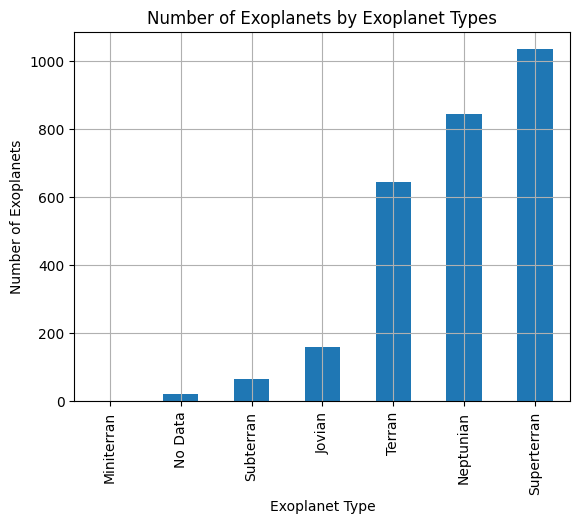

In [283]:
# Plot the graph for the number of exoplanets by exoplanet classes
exoplanet_types = exoplanets_data['pl_type'].map(lambda x: x)
exoplanet_types.value_counts().sort_values().plot(kind='bar',
                                                  xlabel='Exoplanet Type',
                                                  ylabel='Number of Exoplanets',
                                                  title='Number of Exoplanets by Exoplanet Types',
                                                  grid=True)
exoplanet_types.value_counts().sort_values()

st_spectype
A     1
B     2
F     6
M    14
G    23
K    25
Name: count, dtype: int64

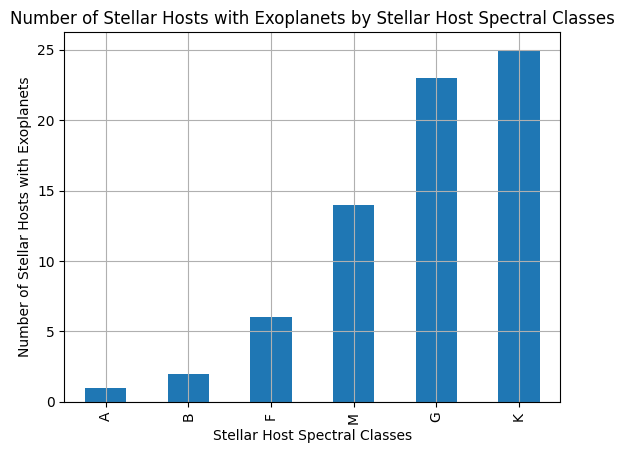

In [285]:
# Keep the stellar hosts with OBAFGKM spectral classes
exoplanets_with_spectypes = exoplanets_data[exoplanets_data['st_spectype'].map(lambda x: x[0].upper() in 'OBAFGKM')]

# Plot the graph for the number of stellar hosts by spectral classes
stellar_host_spectral_classes = exoplanets_with_spectypes['st_spectype'].map(lambda x: x[0].upper())
stellar_host_spectral_classes.value_counts().sort_values().plot(kind='bar',
                                                                xlabel='Stellar Host Spectral Classes',
                                                                ylabel='Number of Stellar Hosts with Exoplanets',
                                                                title='Number of Stellar Hosts with Exoplanets by Stellar Host Spectral Classes',
                                                                grid=True)
stellar_host_spectral_classes.value_counts().sort_values()

In [286]:
exoplanets_data['st_age'].describe()

count    1476.000000
mean        4.121271
std         1.619305
min         0.036000
25%         3.240000
50%         4.170000
75%         4.570000
max        12.300000
Name: st_age, dtype: float64

st_age
(0, 1]       24
(1, 2]       91
(2, 3]      172
(3, 4]      388
(4, 5]      575
(5, 6]      102
(6, 7]       45
(7, 8]       34
(8, 9]       20
(9, 10]      10
(10, 11]      5
(11, 12]      7
(12, 13]      3
Name: count, dtype: int64

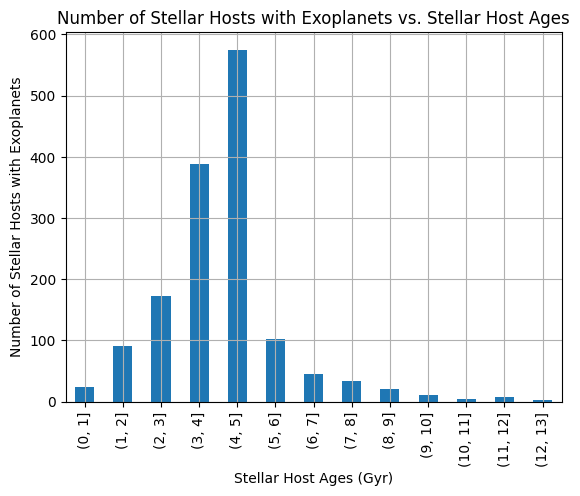

In [287]:
stellar_host_age_buckets = create_buckets(0, 13, 1)
stellar_host_ages_dist = pd.cut(exoplanets_data['st_age'], bins=stellar_host_age_buckets)
stellar_host_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                        xlabel='Stellar Host Ages (Gyr)',
                                                        ylabel='Number of Stellar Hosts with Exoplanets',
                                                        title='Number of Stellar Hosts with Exoplanets vs. Stellar Host Ages',
                                                        grid=True)
stellar_host_ages_dist.value_counts().sort_index()

st_age
(0, 1]      1
(1, 2]      2
(2, 3]      3
(3, 4]      5
(4, 5]      3
(5, 6]      1
(6, 7]      3
(7, 8]      3
(8, 9]      1
(9, 10]     0
(10, 11]    0
(11, 12]    0
(12, 13]    0
Name: count, dtype: int64

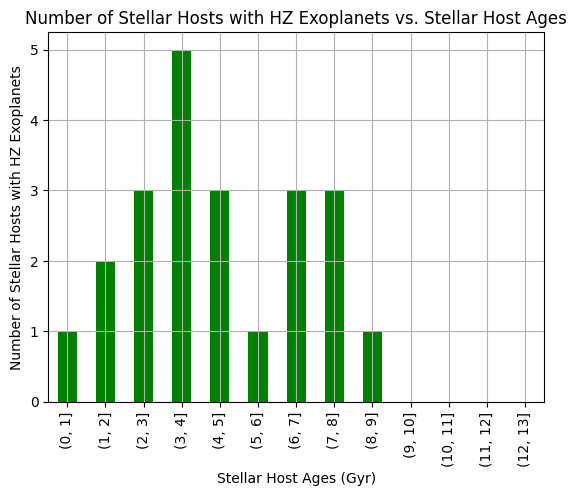

In [288]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_stellar_host_ages_dist = pd.cut(hz_exoplanets_data['st_age'], bins=stellar_host_age_buckets)
hz_stellar_host_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                           xlabel='Stellar Host Ages (Gyr)',
                                                           ylabel='Number of Stellar Hosts with HZ Exoplanets',
                                                           title='Number of Stellar Hosts with HZ Exoplanets vs. Stellar Host Ages',
                                                           color='green',
                                                           grid=True)
hz_stellar_host_ages_dist.value_counts().sort_index()

st_age
(0, 1]      1
(1, 2]      1
(2, 3]      0
(3, 4]      2
(4, 5]      2
(5, 6]      1
(6, 7]      3
(7, 8]      2
(8, 9]      1
(9, 10]     0
(10, 11]    0
(11, 12]    0
(12, 13]    0
Name: count, dtype: int64

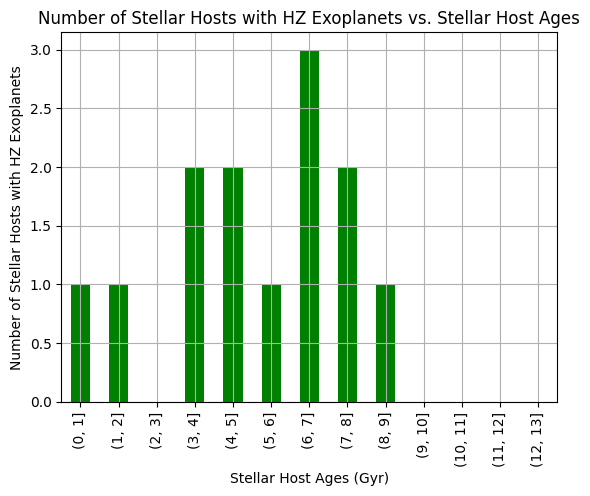

In [289]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label_by_eqt'])) & (exoplanets_data['hz_label_by_eqt'] == 1))]
hz_stellar_host_ages_dist = pd.cut(hz_exoplanets_data['st_age'], bins=stellar_host_age_buckets)
hz_stellar_host_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                           xlabel='Stellar Host Ages (Gyr)',
                                                           ylabel='Number of Stellar Hosts with HZ Exoplanets',
                                                           title='Number of Stellar Hosts with HZ Exoplanets vs. Stellar Host Ages',
                                                           color='green',
                                                           grid=True)
hz_stellar_host_ages_dist.value_counts().sort_index()

st_age
(0, 1]      0
(1, 2]      2
(2, 3]      3
(3, 4]      4
(4, 5]      2
(5, 6]      1
(6, 7]      1
(7, 8]      3
(8, 9]      0
(9, 10]     0
(10, 11]    0
(11, 12]    0
(12, 13]    0
Name: count, dtype: int64

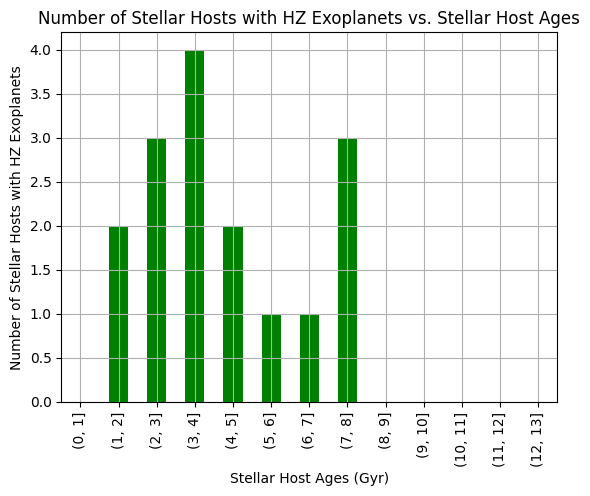

In [290]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label_by_insol'])) & (exoplanets_data['hz_label_by_insol'] == 1))]
hz_stellar_host_ages_dist = pd.cut(hz_exoplanets_data['st_age'], bins=stellar_host_age_buckets)
hz_stellar_host_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                           xlabel='Stellar Host Ages (Gyr)',
                                                           ylabel='Number of Stellar Hosts with HZ Exoplanets',
                                                           title='Number of Stellar Hosts with HZ Exoplanets vs. Stellar Host Ages',
                                                           color='green',
                                                           grid=True)
hz_stellar_host_ages_dist.value_counts().sort_index()

st_age
(0.0, 0.1]      3
(0.1, 0.2]      2
(0.2, 0.3]      8
(0.3, 0.4]      0
(0.4, 0.5]      3
               ..
(11.8, 11.9]    0
(11.9, 12.0]    0
(12.0, 12.1]    1
(12.1, 12.2]    0
(12.2, 12.3]    0
Name: count, Length: 123, dtype: int64

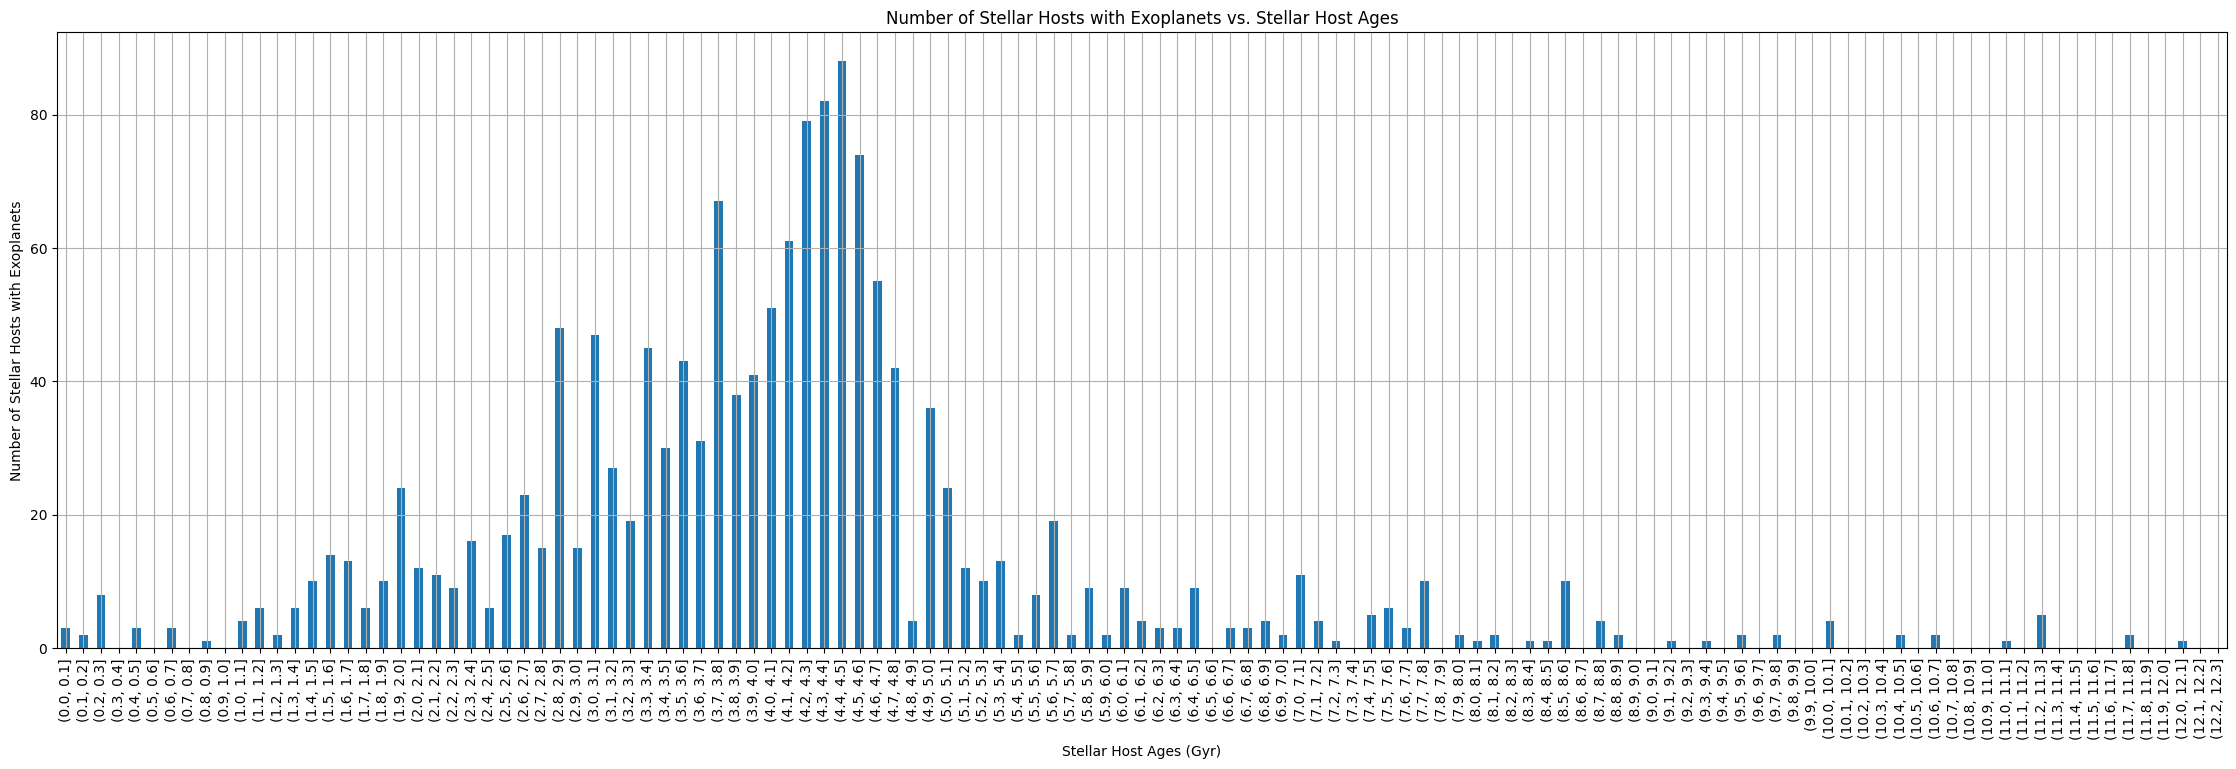

In [291]:
stellar_host_age_buckets = create_buckets(0, 12.3, 0.1)
stellar_host_ages_dist = pd.cut(exoplanets_data['st_age'], bins=stellar_host_age_buckets)
stellar_host_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                        figsize=(28, 8),
                                                        xlabel='Stellar Host Ages (Gyr)',
                                                        ylabel='Number of Stellar Hosts with Exoplanets',
                                                        title='Number of Stellar Hosts with Exoplanets vs. Stellar Host Ages',
                                                        grid=True)
stellar_host_ages_dist.value_counts().sort_index()

st_age
(0.0, 0.1]      0
(0.1, 0.2]      0
(0.2, 0.3]      0
(0.3, 0.4]      0
(0.4, 0.5]      0
               ..
(11.8, 11.9]    0
(11.9, 12.0]    0
(12.0, 12.1]    0
(12.1, 12.2]    0
(12.2, 12.3]    0
Name: count, Length: 123, dtype: int64

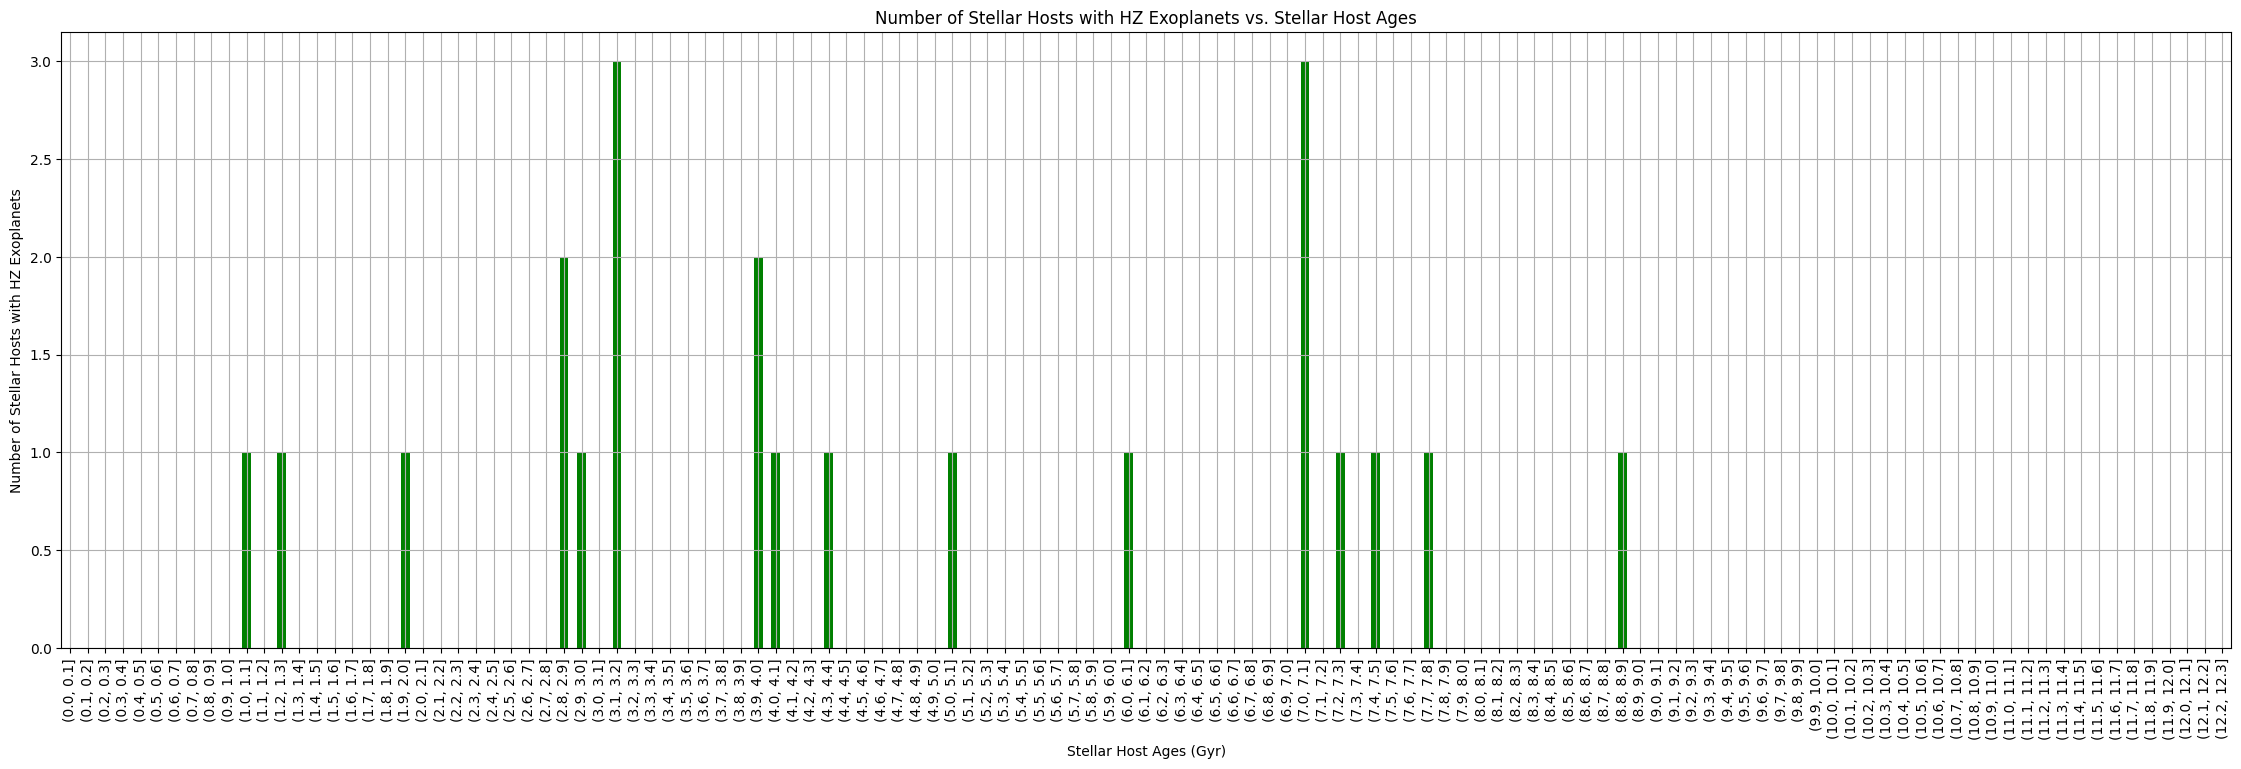

In [292]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_stellar_host_ages_dist = pd.cut(hz_exoplanets_data['st_age'], bins=stellar_host_age_buckets)
hz_stellar_host_ages_dist.value_counts().sort_index().plot(kind='bar',
                                                           figsize=(28, 8),
                                                           xlabel='Stellar Host Ages (Gyr)',
                                                           ylabel='Number of Stellar Hosts with HZ Exoplanets',
                                                           title='Number of Stellar Hosts with HZ Exoplanets vs. Stellar Host Ages',
                                                           color='green',
                                                           grid=True)
hz_stellar_host_ages_dist.value_counts().sort_index()

In [293]:
exoplanets_data['pl_orbeccen'].describe()

count    291.000000
mean       0.099753
std        0.162931
min        0.000000
25%        0.000000
50%        0.030000
75%        0.111000
max        0.920000
Name: pl_orbeccen, dtype: float64

pl_orbeccen
(0.0, 0.1]    103
(0.1, 0.2]     33
(0.2, 0.3]      9
(0.3, 0.4]     19
(0.4, 0.5]      8
(0.5, 0.6]      3
(0.6, 0.7]      2
(0.7, 0.8]      2
(0.8, 0.9]      2
(0.9, 1.0]      1
Name: count, dtype: int64

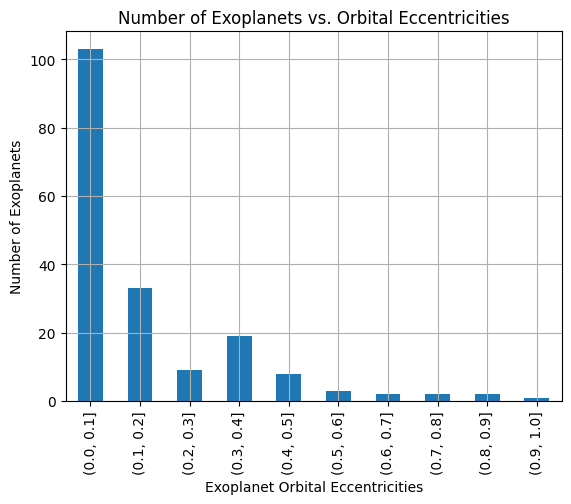

In [294]:
exoplanet_eccentricity_buckets = create_buckets(0, 1, 0.1)
exoplanet_eccentricities_dist = pd.cut(exoplanets_data['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                               xlabel='Exoplanet Orbital Eccentricities',
                                                               ylabel='Number of Exoplanets',
                                                               title='Number of Exoplanets vs. Orbital Eccentricities',
                                                               grid=True)
exoplanet_eccentricities_dist.value_counts().sort_index()

pl_orbeccen
(0.0, 0.1]    7
(0.1, 0.2]    3
(0.2, 0.3]    3
(0.3, 0.4]    5
(0.4, 0.5]    1
(0.5, 0.6]    0
(0.6, 0.7]    0
(0.7, 0.8]    1
(0.8, 0.9]    0
(0.9, 1.0]    1
Name: count, dtype: int64

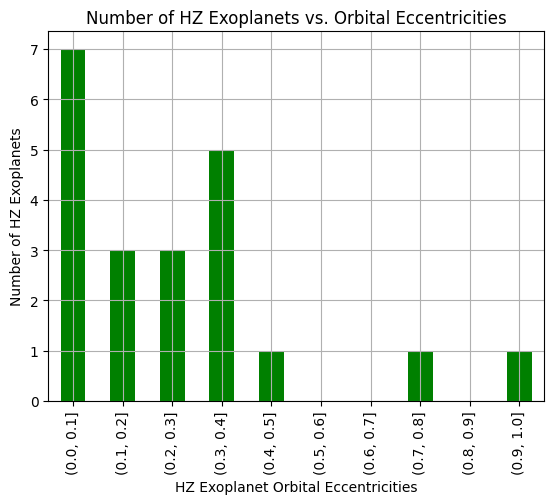

In [295]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_eccentricities_dist = pd.cut(hz_exoplanets_data['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
hz_exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                                  xlabel='HZ Exoplanet Orbital Eccentricities',
                                                                  ylabel='Number of HZ Exoplanets',
                                                                  title='Number of HZ Exoplanets vs. Orbital Eccentricities',
                                                                  color='green',
                                                                  grid=True)
hz_exoplanet_eccentricities_dist.value_counts().sort_index()

pl_orbeccen
(0.0, 0.01]     11
(0.01, 0.02]    18
(0.02, 0.03]    11
(0.03, 0.04]    11
(0.04, 0.05]     9
                ..
(0.86, 0.87]     0
(0.87, 0.88]     0
(0.88, 0.89]     0
(0.89, 0.9]      0
(0.9, 0.91]      0
Name: count, Length: 91, dtype: int64

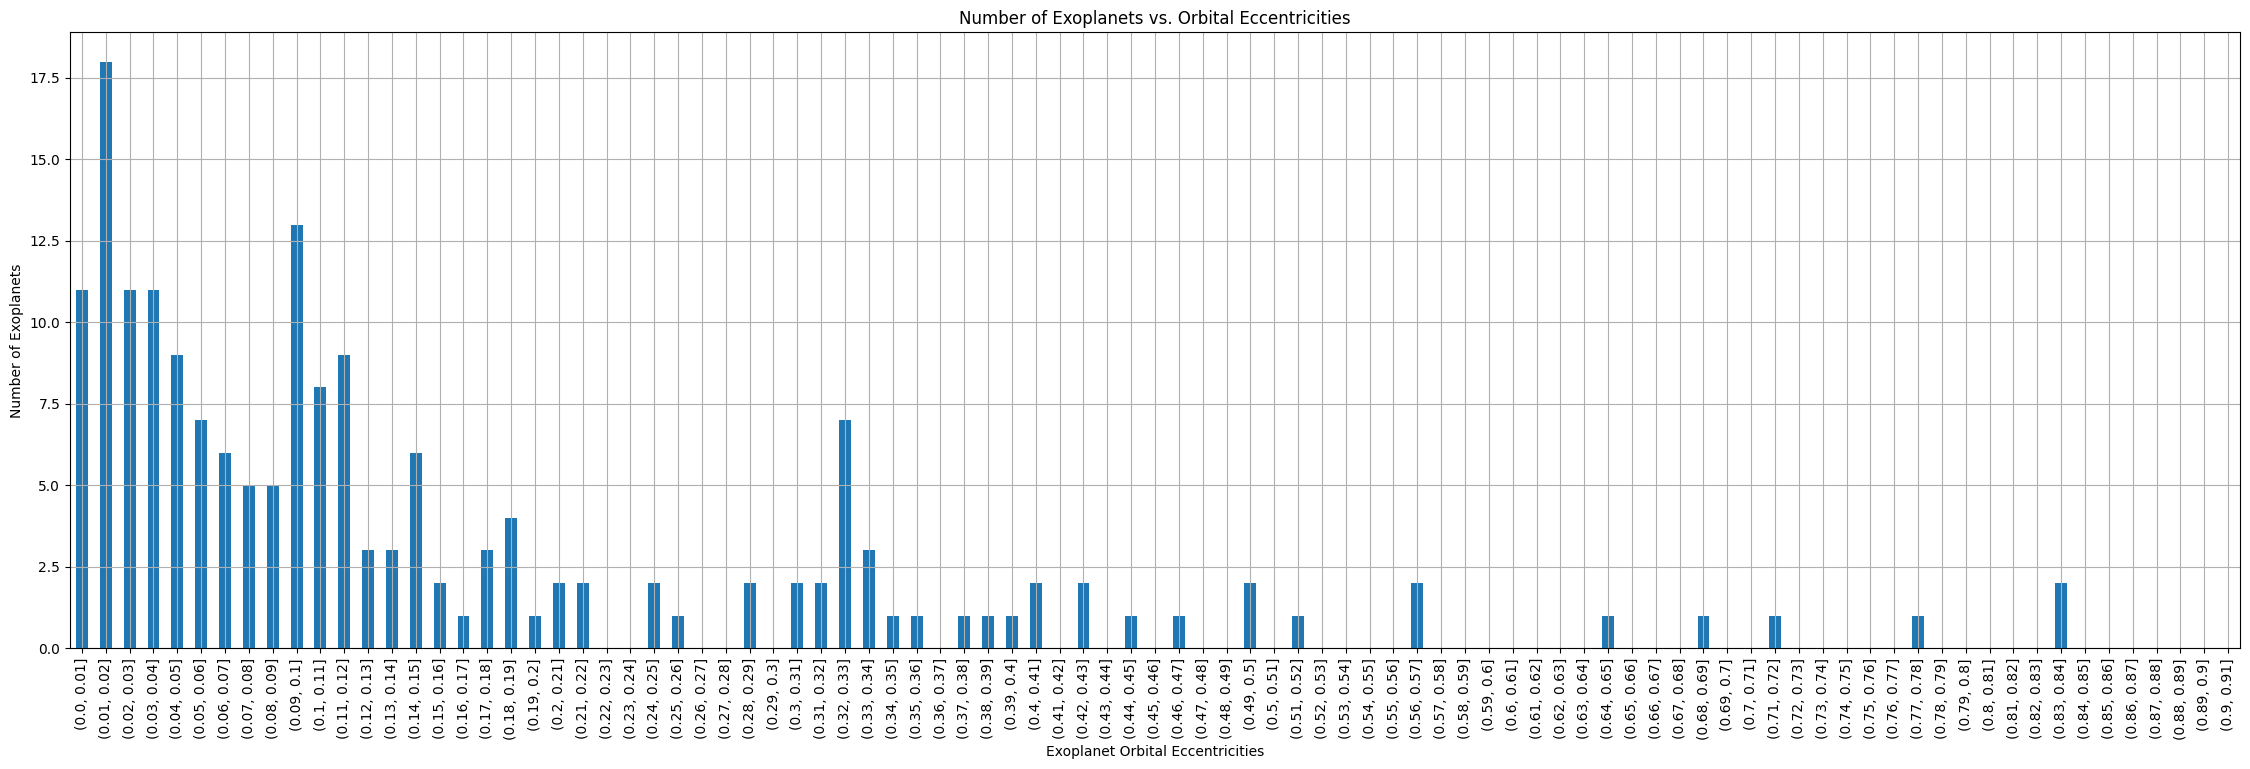

In [296]:
exoplanet_eccentricity_buckets = create_buckets(0, 0.92, 0.01)
exoplanet_eccentricities_dist = pd.cut(exoplanets_data['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                               figsize=(28, 8),
                                                               xlabel='Exoplanet Orbital Eccentricities',
                                                               ylabel='Number of Exoplanets',
                                                               title='Number of Exoplanets vs. Orbital Eccentricities',
                                                               grid=True)
exoplanet_eccentricities_dist.value_counts().sort_index()

pl_orbeccen
(0.0, 0.01]     0
(0.01, 0.02]    1
(0.02, 0.03]    2
(0.03, 0.04]    2
(0.04, 0.05]    1
               ..
(0.86, 0.87]    0
(0.87, 0.88]    0
(0.88, 0.89]    0
(0.89, 0.9]     0
(0.9, 0.91]     0
Name: count, Length: 91, dtype: int64

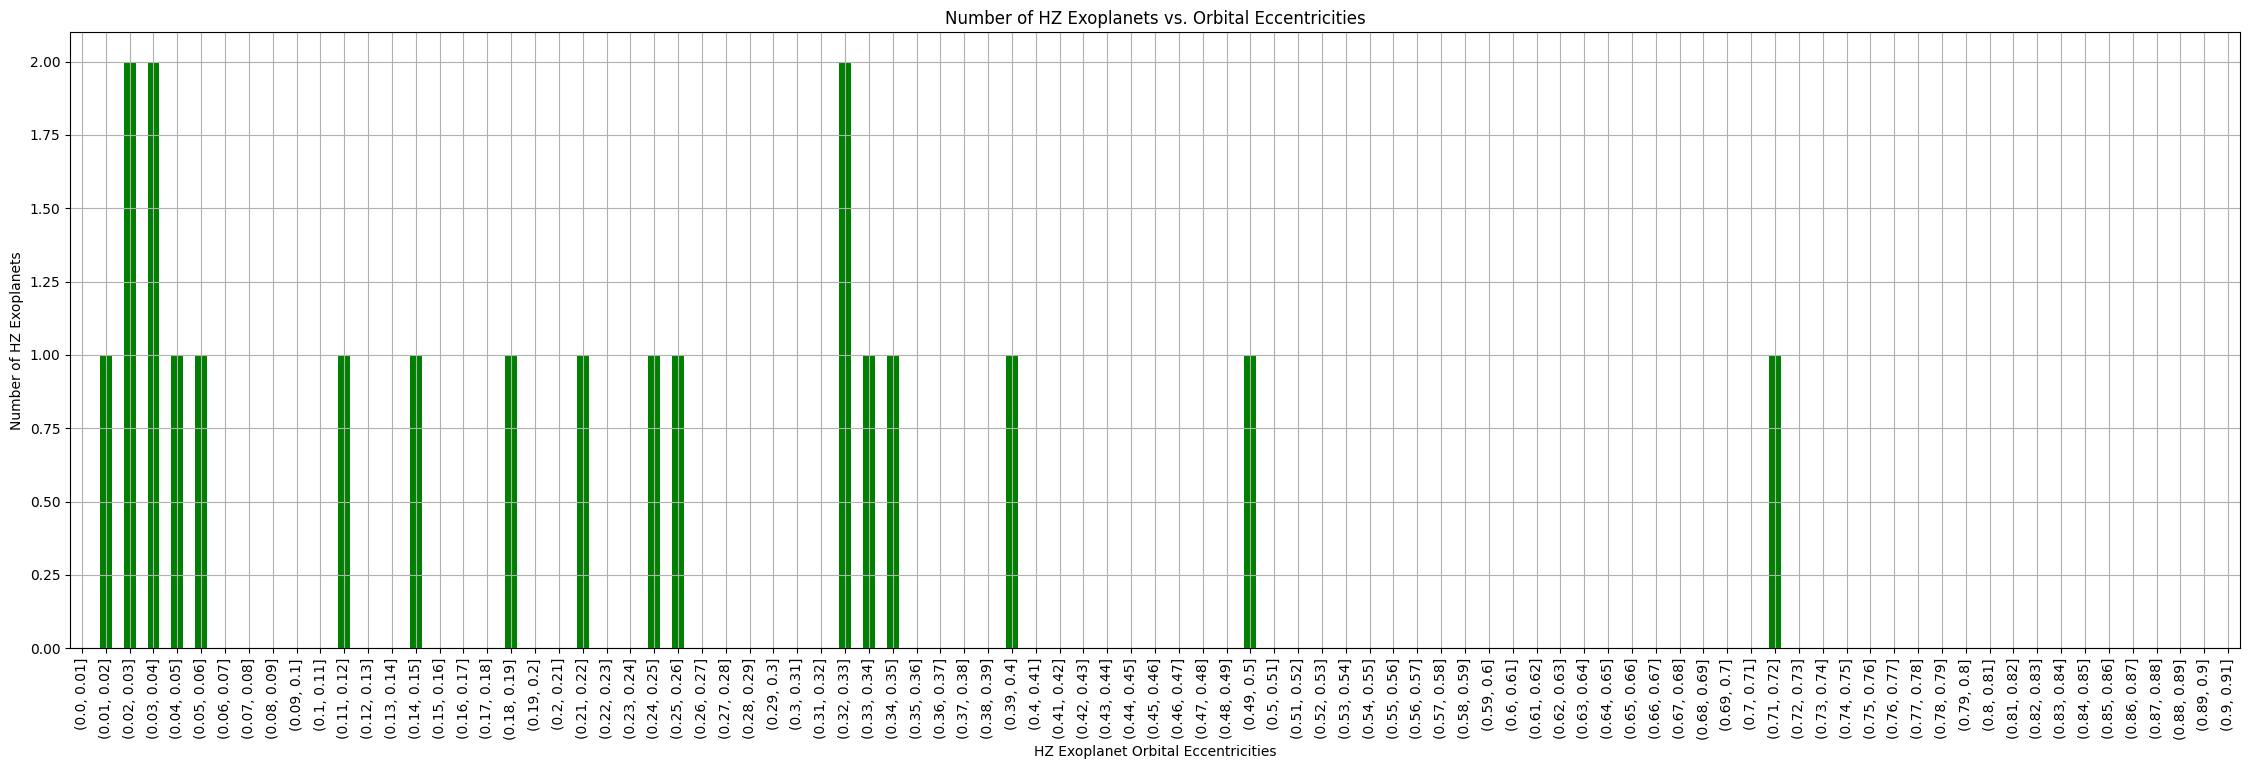

In [297]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_eccentricities_dist = pd.cut(hz_exoplanets_data['pl_orbeccen'], bins=exoplanet_eccentricity_buckets)
hz_exoplanet_eccentricities_dist.value_counts().sort_index().plot(kind='bar',
                                                                  figsize=(28, 8),
                                                                  xlabel='HZ Exoplanet Orbital Eccentricities',
                                                                  ylabel='Number of HZ Exoplanets',
                                                                  title='Number of HZ Exoplanets vs. Orbital Eccentricities',
                                                                  color='green',
                                                                  grid=True)
hz_exoplanet_eccentricities_dist.value_counts().sort_index()

In [298]:
# Classify exoplanets by orbital_eccentricity according to https://en.wikipedia.org/wiki/Orbital_eccentricity
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_orbeccen'])) & (exoplanets_data['pl_orbeccen'] == 0)), 'pl_orbe_type'] = 'Circular Orbit'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_orbeccen'])) & ((exoplanets_data['pl_orbeccen'] > 0) & (exoplanets_data['pl_orbeccen'] < 1))), 'pl_orbe_type'] = 'Elliptic Orbit'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_orbeccen'])) & (exoplanets_data['pl_orbeccen'] == 1)), 'pl_orbe_type'] = 'Parabolic Trajectory'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_orbeccen'])) & (exoplanets_data['pl_orbeccen'] > 1)), 'pl_orbe_type'] = 'Hyperbolic Trajectory'
exoplanets_data['pl_orbe_type'].value_counts()

pl_orbe_type
Elliptic Orbit    182
Circular Orbit    109
Name: count, dtype: int64

pl_orbe_type
Circular Orbit    109
Elliptic Orbit    182
Name: count, dtype: int64

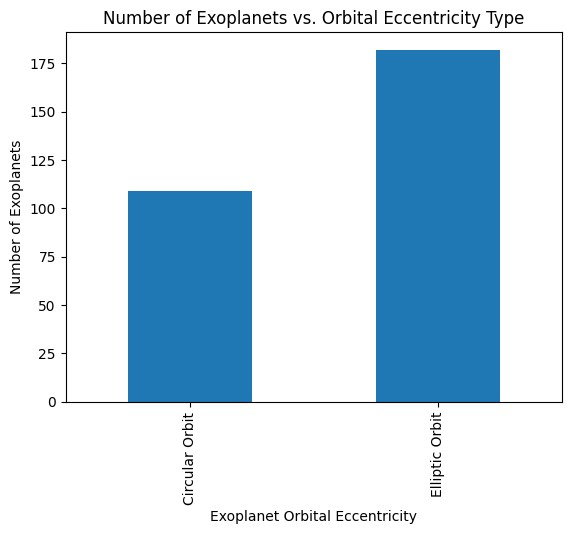

In [299]:
exoplanet_orbe_types = exoplanets_data['pl_orbe_type'].map(lambda x: x)
exoplanet_orbe_types.value_counts().sort_index().plot(kind='bar',
                                                      xlabel='Exoplanet Orbital Eccentricity',
                                                      ylabel='Number of Exoplanets',
                                                      title='Number of Exoplanets vs. Orbital Eccentricity Type')
exoplanet_orbe_types.value_counts().sort_index()

pl_orbe_type
Circular Orbit     3
Elliptic Orbit    21
Name: count, dtype: int64

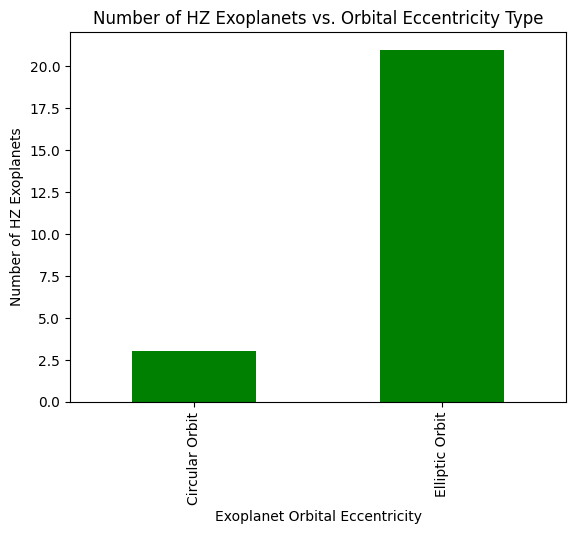

In [300]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_orbe_types = hz_exoplanets_data['pl_orbe_type'].map(lambda x: x)
hz_exoplanet_orbe_types.value_counts().sort_index().plot(kind='bar',
                                                         xlabel='Exoplanet Orbital Eccentricity',
                                                         ylabel='Number of HZ Exoplanets',
                                                         title='Number of HZ Exoplanets vs. Orbital Eccentricity Type',
                                                         color='green')
hz_exoplanet_orbe_types.value_counts().sort_index()

In [301]:
exoplanets_data['pl_orbper'].describe()

count    2774.000000
mean       32.409955
std        90.774635
min         0.219700
25%         5.145515
50%        11.456085
75%        27.079978
max      2500.000000
Name: pl_orbper, dtype: float64

pl_orbper
(0, 20]         1874
(20, 40]         414
(40, 60]         180
(60, 80]          67
(80, 100]         63
                ... 
(1300, 1320]       0
(1320, 1340]       1
(1340, 1360]       0
(1360, 1380]       0
(1380, 1400]       0
Name: count, Length: 70, dtype: int64

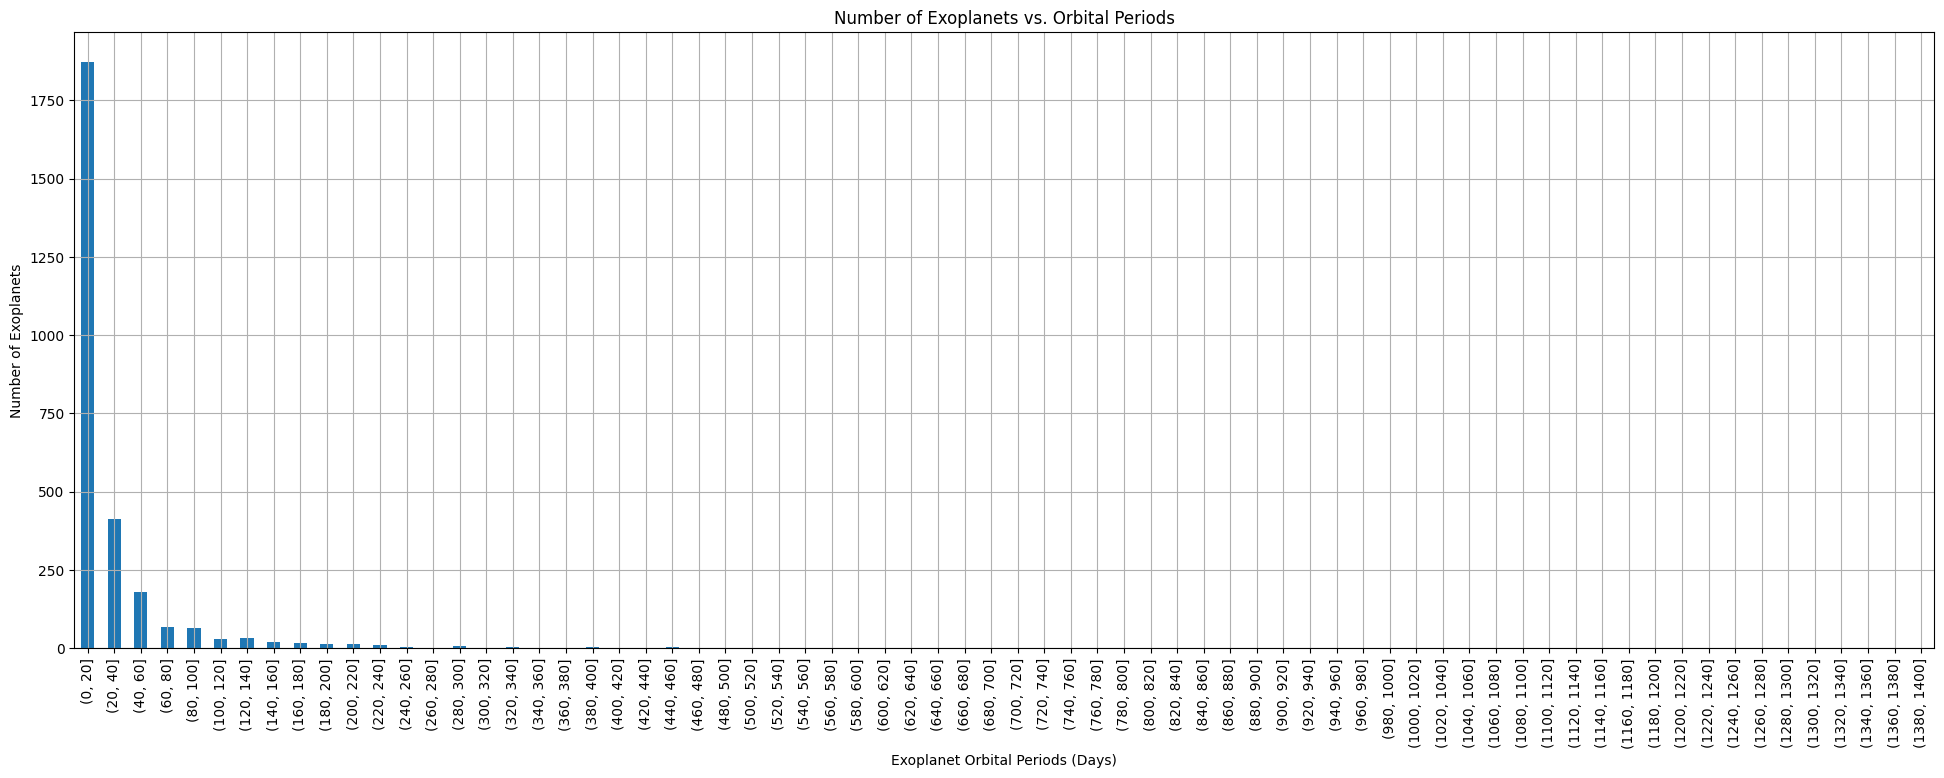

In [302]:
exoplanet_orbit_period_buckets = create_buckets(0, 1400, 20)
exoplanet_orbit_periods_dist = pd.cut(exoplanets_data['pl_orbper'], bins=exoplanet_orbit_period_buckets)
exoplanet_orbit_periods_dist.value_counts().sort_index().plot(kind='bar',
                                                              figsize=(24, 8),
                                                              xlabel='Exoplanet Orbital Periods (Days)',
                                                              ylabel='Number of Exoplanets',
                                                              title='Number of Exoplanets vs. Orbital Periods',
                                                              grid=True)
exoplanet_orbit_periods_dist.value_counts().sort_index()

pl_orbper
(0, 20]         1874
(20, 40]         414
(40, 60]         180
(60, 80]          67
(80, 100]         63
                ... 
(1300, 1320]       0
(1320, 1340]       1
(1340, 1360]       0
(1360, 1380]       0
(1380, 1400]       0
Name: count, Length: 70, dtype: int64

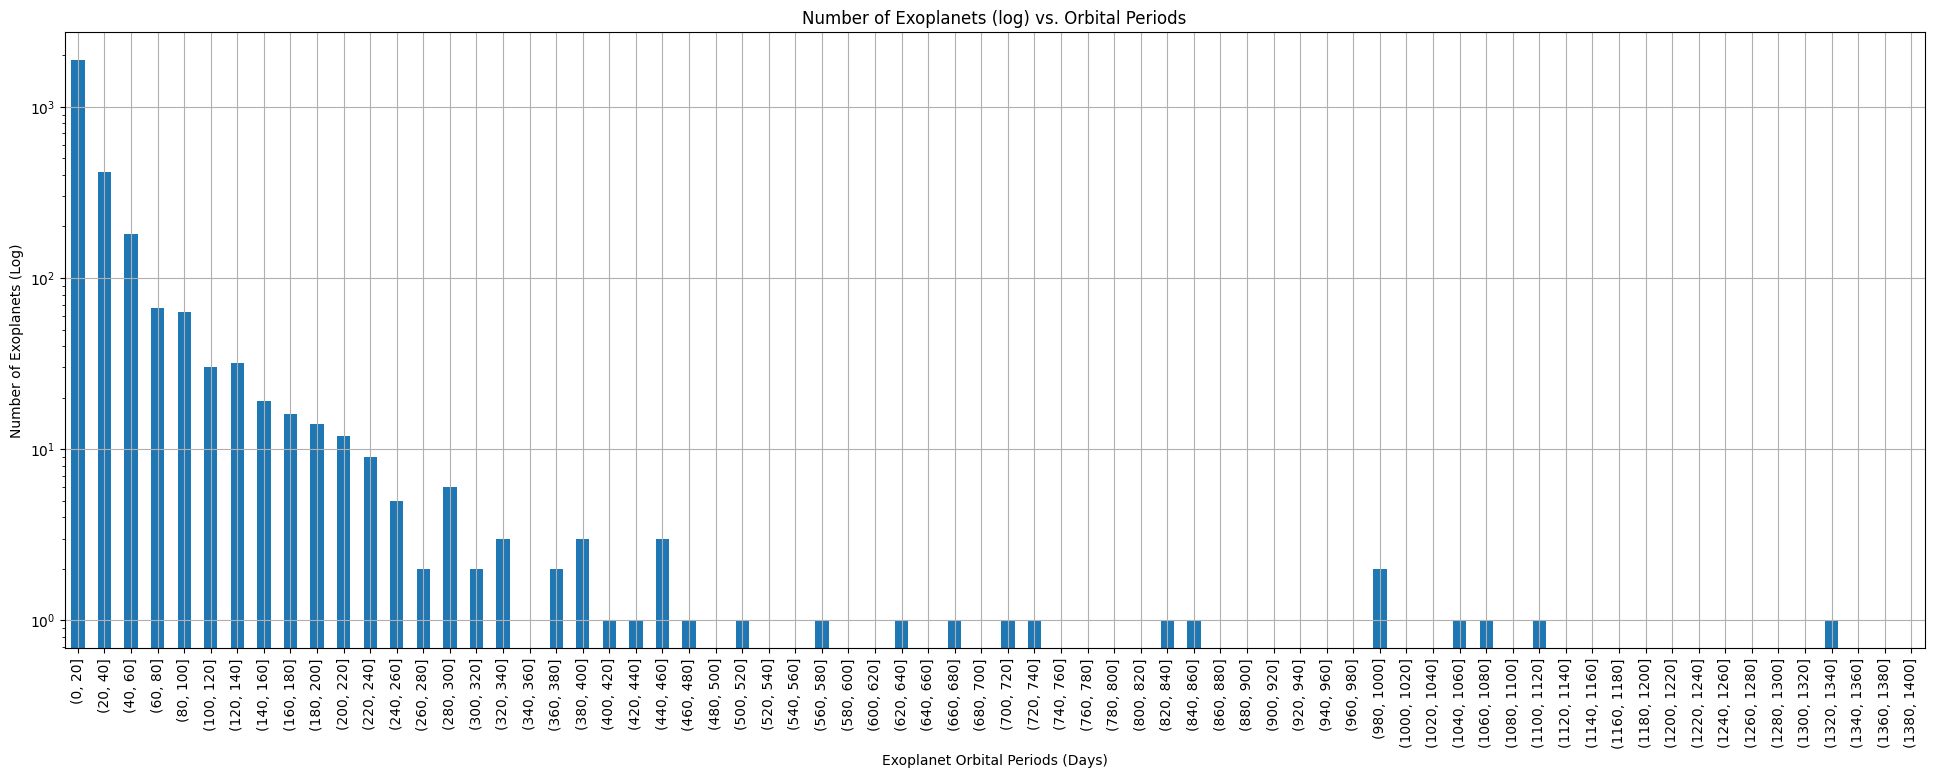

In [303]:
exoplanet_orbit_periods_dist = pd.cut(exoplanets_data['pl_orbper'], bins=exoplanet_orbit_period_buckets)
exoplanet_orbit_periods_dist.value_counts().sort_index().plot(kind='bar',
                                                              figsize=(24, 8),
                                                              xlabel='Exoplanet Orbital Periods (Days)',
                                                              ylabel='Number of Exoplanets (Log)',
                                                              title='Number of Exoplanets (log) vs. Orbital Periods',
                                                              grid=True,
                                                              logy=True)
exoplanet_orbit_periods_dist.value_counts().sort_index()

pl_orbper
(0, 20]         2
(20, 40]        3
(40, 60]        1
(60, 80]        3
(80, 100]       1
               ..
(1300, 1320]    0
(1320, 1340]    0
(1340, 1360]    0
(1360, 1380]    0
(1380, 1400]    0
Name: count, Length: 70, dtype: int64

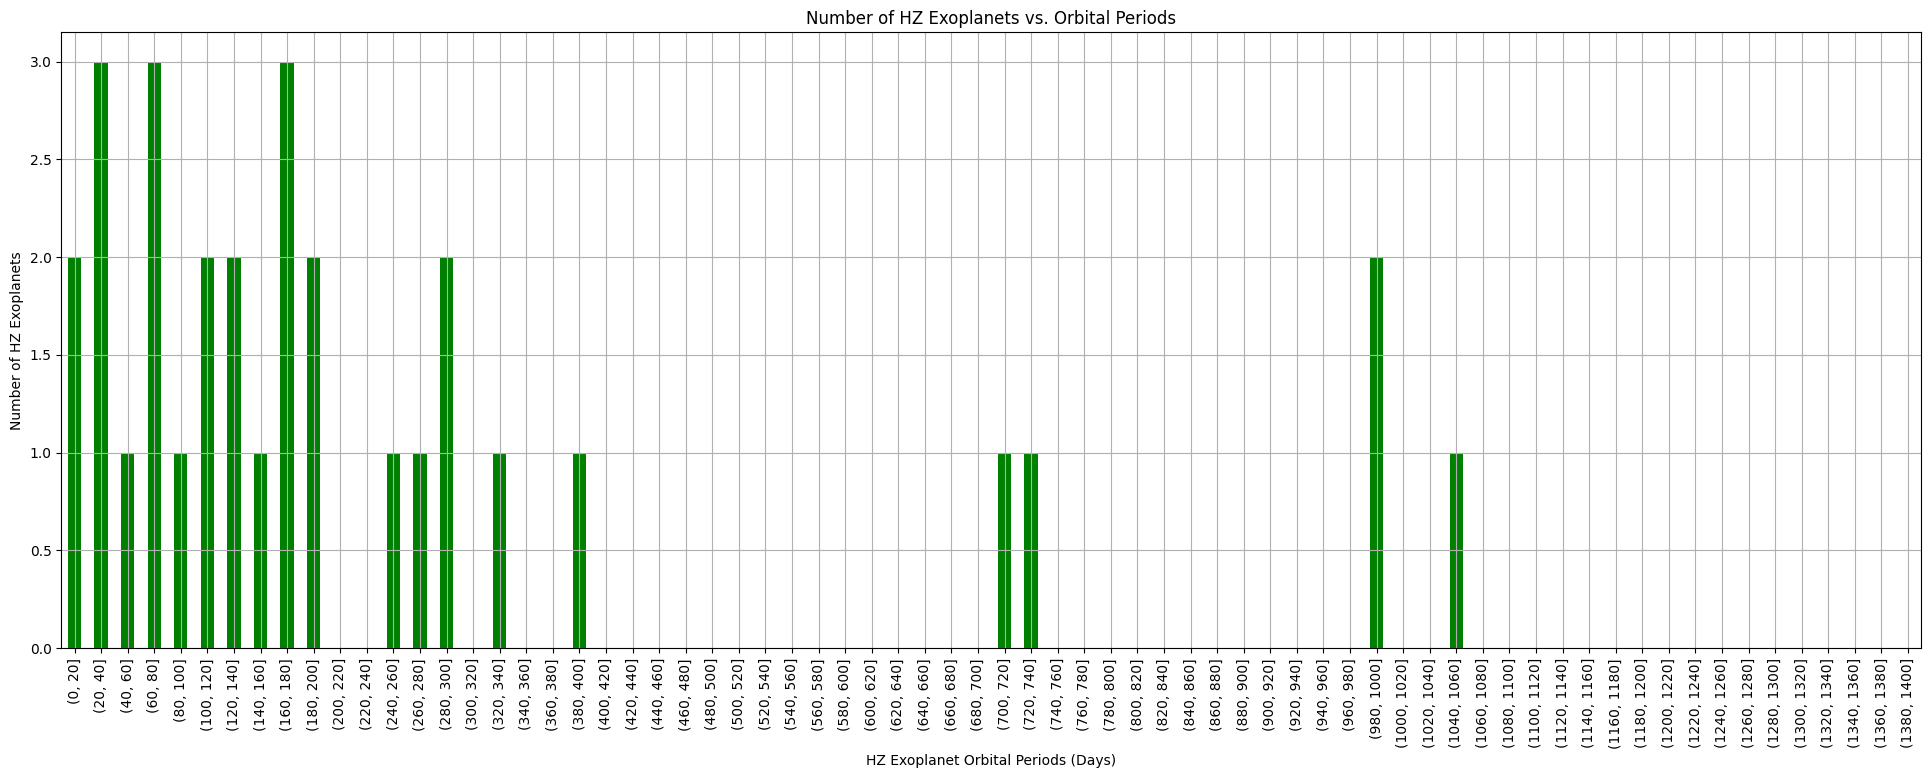

In [304]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_orbit_periods_dist = pd.cut(hz_exoplanets_data['pl_orbper'], bins=exoplanet_orbit_period_buckets)
hz_exoplanet_orbit_periods_dist.value_counts().sort_index().plot(kind='bar',
                                                                 figsize=(24, 8),
                                                                 xlabel='HZ Exoplanet Orbital Periods (Days)',
                                                                 ylabel='Number of HZ Exoplanets',
                                                                 title='Number of HZ Exoplanets vs. Orbital Periods',
                                                                 color='green',
                                                                 grid=True)
hz_exoplanet_orbit_periods_dist.value_counts().sort_index()

In [305]:
exoplanets_data['pl_orbsmax'].describe()

count    1004.000000
mean        0.170554
std         0.260871
min         0.006000
25%         0.062000
50%         0.103000
75%         0.181000
max         4.200000
Name: pl_orbsmax, dtype: float64

pl_orbsmax
(0.0, 0.1]    486
(0.1, 0.2]    305
(0.2, 0.3]     97
(0.3, 0.4]     43
(0.4, 0.5]     24
(0.5, 0.6]     10
(0.6, 0.7]     11
(0.7, 0.8]      9
(0.8, 0.9]      3
(0.9, 1.0]      1
(1.0, 1.1]      3
(1.1, 1.2]      1
(1.2, 1.3]      2
(1.3, 1.4]      1
(1.4, 1.5]      0
(1.5, 1.6]      0
(1.6, 1.7]      2
(1.7, 1.8]      0
(1.8, 1.9]      1
(1.9, 2.0]      0
(2.0, 2.1]      2
(2.1, 2.2]      0
(2.2, 2.3]      0
(2.3, 2.4]      0
(2.4, 2.5]      1
(2.5, 2.6]      0
(2.6, 2.7]      0
(2.7, 2.8]      1
(2.8, 2.9]      0
(2.9, 3.0]      0
(3.0, 3.1]      0
(3.1, 3.2]      0
(3.2, 3.3]      0
(3.3, 3.4]      0
(3.4, 3.5]      0
(3.5, 3.6]      0
(3.6, 3.7]      0
(3.7, 3.8]      0
(3.8, 3.9]      0
(3.9, 4.0]      0
(4.0, 4.1]      0
(4.1, 4.2]      1
Name: count, dtype: int64

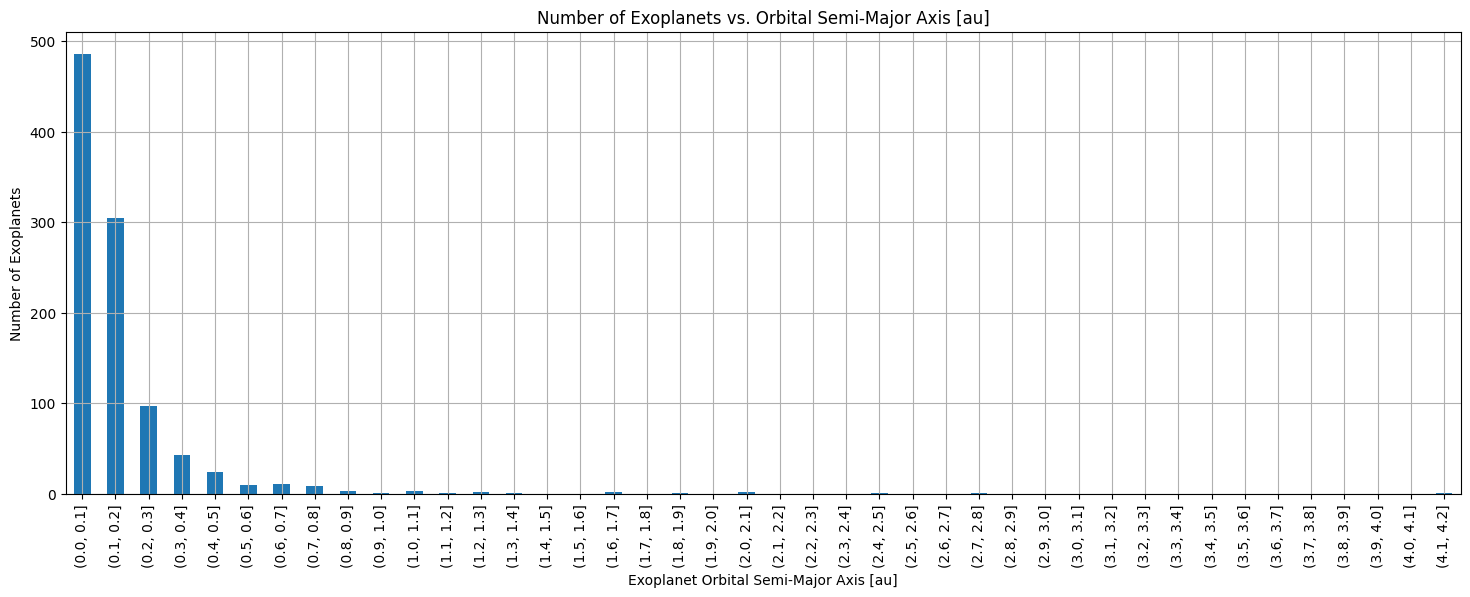

In [306]:
exoplanet_orbit_au_buckets = create_buckets(0, 4.3, 0.1)
exoplanet_orbit_au_dist = pd.cut(exoplanets_data['pl_orbsmax'], bins=exoplanet_orbit_au_buckets)
exoplanet_orbit_au_dist.value_counts().sort_index().plot(kind='bar',
                                                         figsize=(18, 6),
                                                         xlabel='Exoplanet Orbital Semi-Major Axis [au]',
                                                         ylabel='Number of Exoplanets',
                                                         title='Number of Exoplanets vs. Orbital Semi-Major Axis [au]',
                                                         grid=True)
exoplanet_orbit_au_dist.value_counts().sort_index()

pl_orbsmax
(0.0, 0.1]    486
(0.1, 0.2]    305
(0.2, 0.3]     97
(0.3, 0.4]     43
(0.4, 0.5]     24
(0.5, 0.6]     10
(0.6, 0.7]     11
(0.7, 0.8]      9
(0.8, 0.9]      3
(0.9, 1.0]      1
(1.0, 1.1]      3
(1.1, 1.2]      1
(1.2, 1.3]      2
(1.3, 1.4]      1
(1.4, 1.5]      0
(1.5, 1.6]      0
(1.6, 1.7]      2
(1.7, 1.8]      0
(1.8, 1.9]      1
(1.9, 2.0]      0
(2.0, 2.1]      2
(2.1, 2.2]      0
(2.2, 2.3]      0
(2.3, 2.4]      0
(2.4, 2.5]      1
(2.5, 2.6]      0
(2.6, 2.7]      0
(2.7, 2.8]      1
(2.8, 2.9]      0
(2.9, 3.0]      0
(3.0, 3.1]      0
(3.1, 3.2]      0
(3.2, 3.3]      0
(3.3, 3.4]      0
(3.4, 3.5]      0
(3.5, 3.6]      0
(3.6, 3.7]      0
(3.7, 3.8]      0
(3.8, 3.9]      0
(3.9, 4.0]      0
(4.0, 4.1]      0
(4.1, 4.2]      1
Name: count, dtype: int64

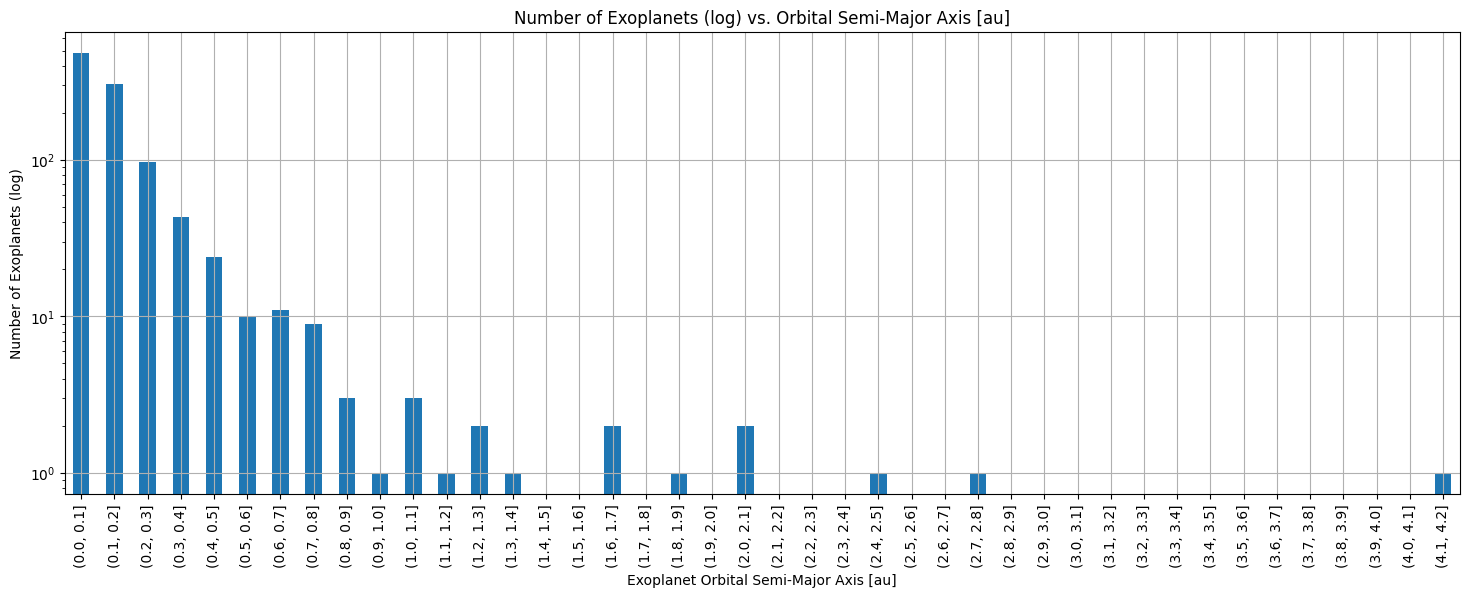

In [307]:
exoplanet_orbit_au_dist = pd.cut(exoplanets_data['pl_orbsmax'], bins=exoplanet_orbit_au_buckets)
exoplanet_orbit_au_dist.value_counts().sort_index().plot(kind='bar',
                                                         figsize=(18, 6),
                                                         xlabel='Exoplanet Orbital Semi-Major Axis [au]',
                                                         ylabel='Number of Exoplanets (log)',
                                                         title='Number of Exoplanets (log) vs. Orbital Semi-Major Axis [au]',
                                                         grid=True,
                                                         logy=True)
exoplanet_orbit_au_dist.value_counts().sort_index()

pl_orbsmax
(0.0, 0.1]    0
(0.1, 0.2]    3
(0.2, 0.3]    3
(0.3, 0.4]    2
(0.4, 0.5]    5
(0.5, 0.6]    1
(0.6, 0.7]    4
(0.7, 0.8]    1
(0.8, 0.9]    3
(0.9, 1.0]    0
(1.0, 1.1]    1
(1.1, 1.2]    0
(1.2, 1.3]    1
(1.3, 1.4]    0
(1.4, 1.5]    0
(1.5, 1.6]    0
(1.6, 1.7]    1
(1.7, 1.8]    0
(1.8, 1.9]    0
(1.9, 2.0]    0
(2.0, 2.1]    2
(2.1, 2.2]    0
(2.2, 2.3]    0
(2.3, 2.4]    0
(2.4, 2.5]    1
(2.5, 2.6]    0
(2.6, 2.7]    0
(2.7, 2.8]    0
(2.8, 2.9]    0
(2.9, 3.0]    0
(3.0, 3.1]    0
(3.1, 3.2]    0
(3.2, 3.3]    0
(3.3, 3.4]    0
(3.4, 3.5]    0
(3.5, 3.6]    0
(3.6, 3.7]    0
(3.7, 3.8]    0
(3.8, 3.9]    0
(3.9, 4.0]    0
(4.0, 4.1]    0
(4.1, 4.2]    0
Name: count, dtype: int64

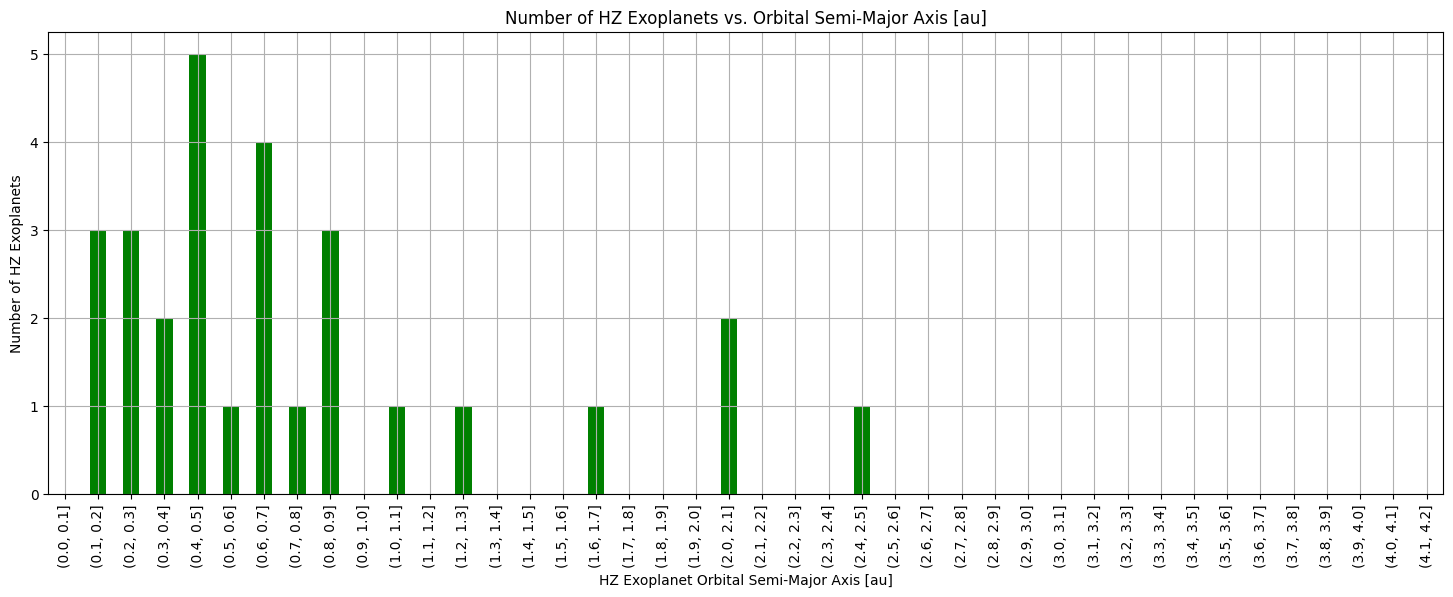

In [308]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_orbit_au_dist = pd.cut(hz_exoplanets_data['pl_orbsmax'], bins=exoplanet_orbit_au_buckets)
hz_exoplanet_orbit_au_dist.value_counts().sort_index().plot(kind='bar',
                                                            figsize=(18, 6),
                                                            xlabel='HZ Exoplanet Orbital Semi-Major Axis [au]',
                                                            ylabel='Number of HZ Exoplanets',
                                                            title='Number of HZ Exoplanets vs. Orbital Semi-Major Axis [au]',
                                                            color='green',
                                                            grid=True)
hz_exoplanet_orbit_au_dist.value_counts().sort_index()

In [309]:
exoplanets_data['pl_ratdor'].describe()

count    248.000000
mean      51.556851
std       71.407966
min        1.971000
25%       11.582500
50%       23.650000
75%       60.975000
max      576.700000
Name: pl_ratdor, dtype: float64

pl_ratdor
(0, 20]       112
(20, 40]       50
(40, 60]       23
(60, 80]       13
(80, 100]      12
(100, 120]      6
(120, 140]      6
(140, 160]     11
(160, 180]      3
(180, 200]      2
(200, 220]      1
(220, 240]      1
(240, 260]      3
(260, 280]      0
(280, 300]      1
(300, 320]      1
(320, 340]      0
(340, 360]      1
(360, 380]      1
(380, 400]      0
(400, 420]      0
(420, 440]      0
(440, 460]      0
(460, 480]      0
(480, 500]      0
(500, 520]      0
(520, 540]      0
(540, 560]      0
(560, 580]      1
Name: count, dtype: int64

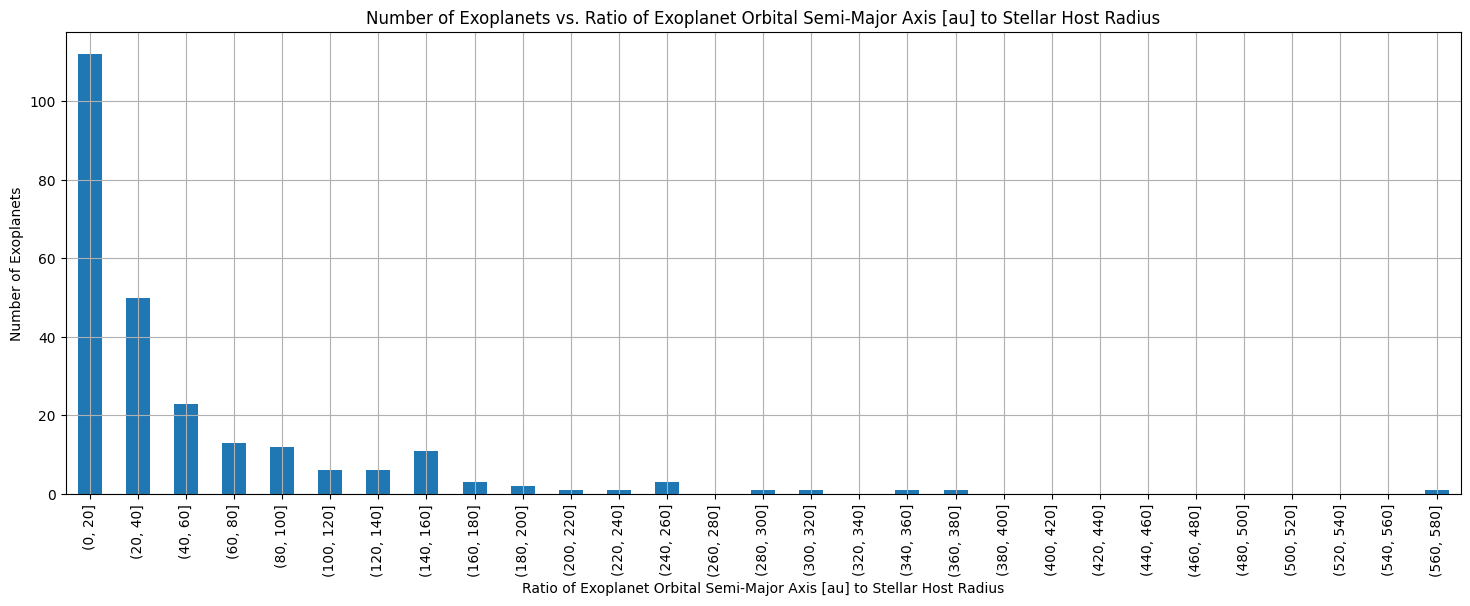

In [310]:
exoplanet_ratdor_buckets = create_buckets(0, 580, 20)
exoplanet_ratdor_dist = pd.cut(exoplanets_data['pl_ratdor'], bins=exoplanet_ratdor_buckets)
exoplanet_ratdor_dist.value_counts().sort_index().plot(kind='bar',
                                                       figsize=(18, 6),
                                                       xlabel='Ratio of Exoplanet Orbital Semi-Major Axis [au] to Stellar Host Radius',
                                                       ylabel='Number of Exoplanets',
                                                       title='Number of Exoplanets vs. Ratio of Exoplanet Orbital Semi-Major Axis [au] to Stellar Host Radius',
                                                       grid=True)
exoplanet_ratdor_dist.value_counts().sort_index()

pl_ratdor
(0, 20]       112
(20, 40]       50
(40, 60]       23
(60, 80]       13
(80, 100]      12
(100, 120]      6
(120, 140]      6
(140, 160]     11
(160, 180]      3
(180, 200]      2
(200, 220]      1
(220, 240]      1
(240, 260]      3
(260, 280]      0
(280, 300]      1
(300, 320]      1
(320, 340]      0
(340, 360]      1
(360, 380]      1
(380, 400]      0
(400, 420]      0
(420, 440]      0
(440, 460]      0
(460, 480]      0
(480, 500]      0
(500, 520]      0
(520, 540]      0
(540, 560]      0
(560, 580]      1
Name: count, dtype: int64

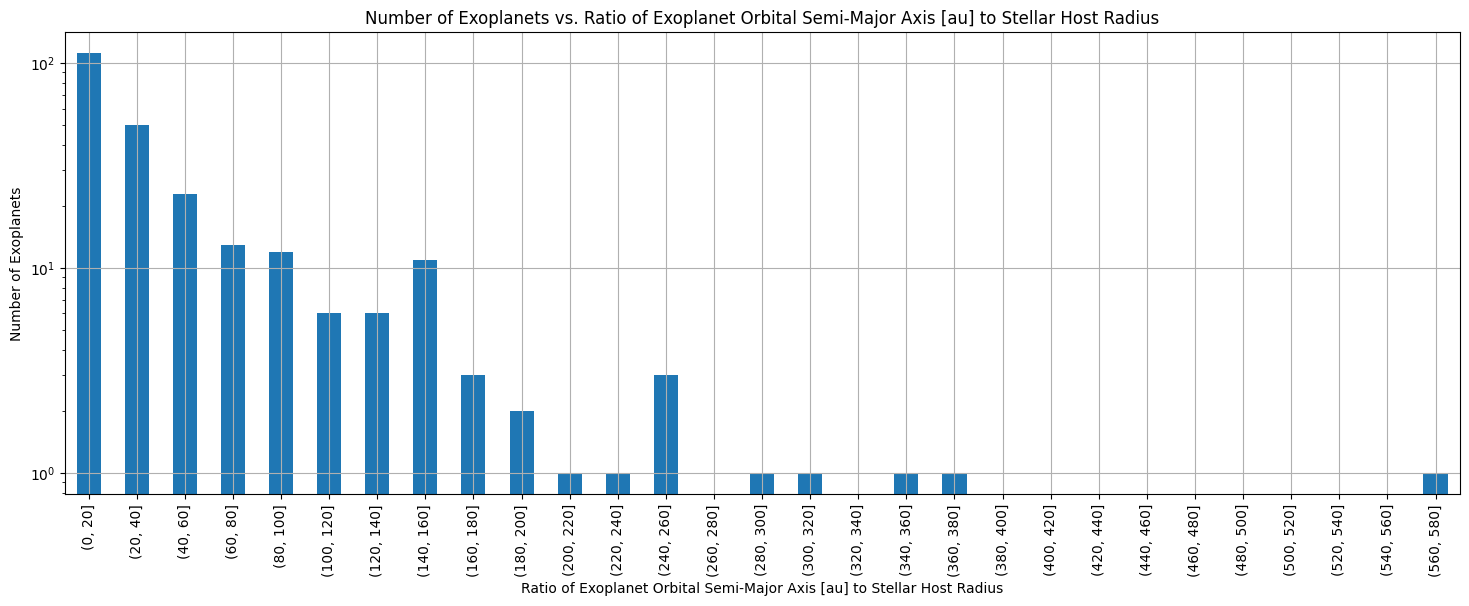

In [311]:
exoplanet_ratdor_dist = pd.cut(exoplanets_data['pl_ratdor'], bins=exoplanet_ratdor_buckets)
exoplanet_ratdor_dist.value_counts().sort_index().plot(kind='bar',
                                                       figsize=(18, 6),
                                                       xlabel='Ratio of Exoplanet Orbital Semi-Major Axis [au] to Stellar Host Radius',
                                                       ylabel='Number of Exoplanets',
                                                       title='Number of Exoplanets vs. Ratio of Exoplanet Orbital Semi-Major Axis [au] to Stellar Host Radius',
                                                       grid=True,
                                                       logy=True)
exoplanet_ratdor_dist.value_counts().sort_index()

pl_ratdor
(0, 20]       0
(20, 40]      0
(40, 60]      1
(60, 80]      4
(80, 100]     4
(100, 120]    2
(120, 140]    0
(140, 160]    7
(160, 180]    2
(180, 200]    1
(200, 220]    1
(220, 240]    0
(240, 260]    2
(260, 280]    0
(280, 300]    0
(300, 320]    1
(320, 340]    0
(340, 360]    1
(360, 380]    1
(380, 400]    0
(400, 420]    0
(420, 440]    0
(440, 460]    0
(460, 480]    0
(480, 500]    0
(500, 520]    0
(520, 540]    0
(540, 560]    0
(560, 580]    0
Name: count, dtype: int64

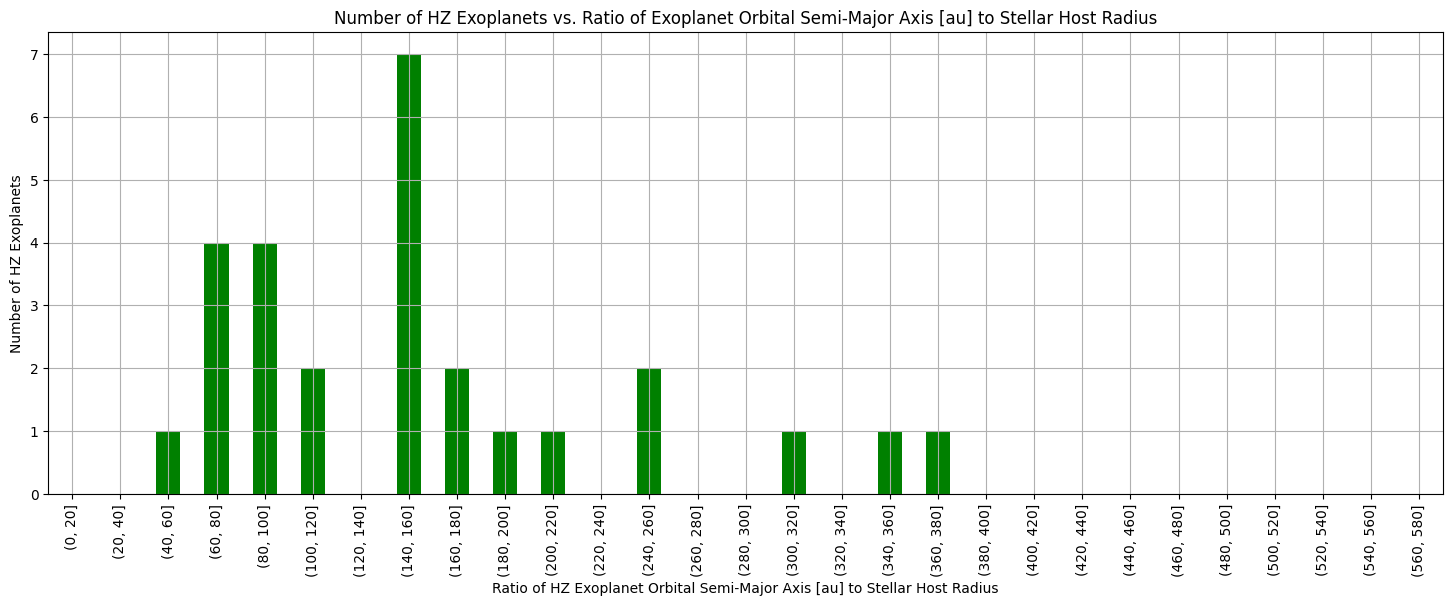

In [312]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_ratdor_dist = pd.cut(hz_exoplanets_data['pl_ratdor'], bins=exoplanet_ratdor_buckets)
hz_exoplanet_ratdor_dist.value_counts().sort_index().plot(kind='bar',
                                                          figsize=(18, 6),
                                                          xlabel='Ratio of HZ Exoplanet Orbital Semi-Major Axis [au] to Stellar Host Radius',
                                                          ylabel='Number of HZ Exoplanets',
                                                          title='Number of HZ Exoplanets vs. Ratio of Exoplanet Orbital Semi-Major Axis [au] to Stellar Host Radius',
                                                          color='green',
                                                          grid=True)
hz_exoplanet_ratdor_dist.value_counts().sort_index()

In [313]:
exoplanets_data['pl_ratror'].describe()

count    1576.000000
mean        0.027133
std         0.024330
min         0.004530
25%         0.014058
50%         0.021105
75%         0.030363
max         0.332850
Name: pl_ratror, dtype: float64

pl_ratror
(0.0, 0.01]     181
(0.01, 0.02]    558
(0.02, 0.03]    435
(0.03, 0.04]    195
(0.04, 0.05]     62
(0.05, 0.06]     32
(0.06, 0.07]     20
(0.07, 0.08]     18
(0.08, 0.09]     18
(0.09, 0.1]      17
(0.1, 0.11]      12
(0.11, 0.12]      8
(0.12, 0.13]     10
(0.13, 0.14]      3
(0.14, 0.15]      2
(0.15, 0.16]      0
(0.16, 0.17]      2
(0.17, 0.18]      1
(0.18, 0.19]      0
(0.19, 0.2]       0
(0.2, 0.21]       0
(0.21, 0.22]      0
(0.22, 0.23]      0
(0.23, 0.24]      0
(0.24, 0.25]      0
(0.25, 0.26]      0
(0.26, 0.27]      0
(0.27, 0.28]      0
(0.28, 0.29]      1
Name: count, dtype: int64

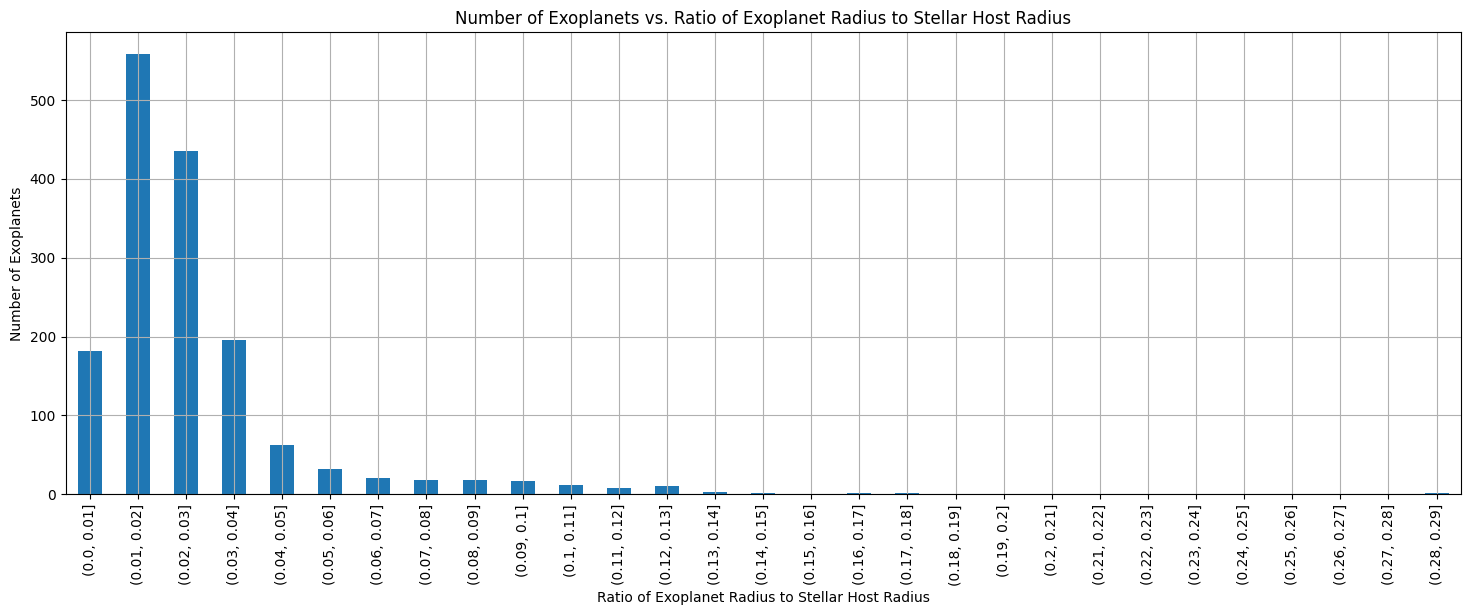

In [314]:
exoplanet_ratror_buckets = create_buckets(0, 0.3, 0.01)
exoplanet_ratror_dist = pd.cut(exoplanets_data['pl_ratror'], bins=exoplanet_ratror_buckets)
exoplanet_ratror_dist.value_counts().sort_index().plot(kind='bar',
                                                       figsize=(18, 6),
                                                       xlabel='Ratio of Exoplanet Radius to Stellar Host Radius',
                                                       ylabel='Number of Exoplanets',
                                                       title='Number of Exoplanets vs. Ratio of Exoplanet Radius to Stellar Host Radius',
                                                       grid=True)
exoplanet_ratror_dist.value_counts().sort_index()

pl_ratror
(0.0, 0.01]     0
(0.01, 0.02]    4
(0.02, 0.03]    9
(0.03, 0.04]    7
(0.04, 0.05]    3
(0.05, 0.06]    1
(0.06, 0.07]    1
(0.07, 0.08]    1
(0.08, 0.09]    1
(0.09, 0.1]     1
(0.1, 0.11]     0
(0.11, 0.12]    1
(0.12, 0.13]    0
(0.13, 0.14]    0
(0.14, 0.15]    0
(0.15, 0.16]    0
(0.16, 0.17]    0
(0.17, 0.18]    0
(0.18, 0.19]    0
(0.19, 0.2]     0
(0.2, 0.21]     0
(0.21, 0.22]    0
(0.22, 0.23]    0
(0.23, 0.24]    0
(0.24, 0.25]    0
(0.25, 0.26]    0
(0.26, 0.27]    0
(0.27, 0.28]    0
(0.28, 0.29]    0
Name: count, dtype: int64

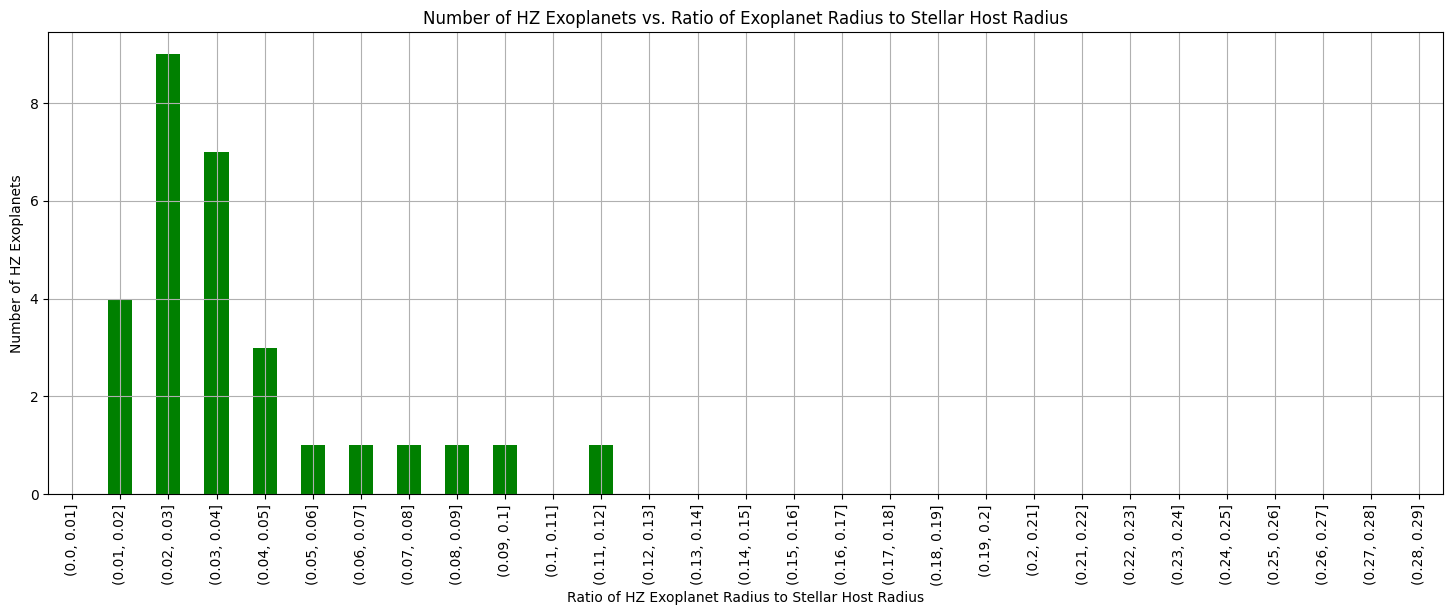

In [315]:
hz_exoplanets_data = exoplanets_data.loc[((~np.isnan(exoplanets_data['hz_label'])) & (exoplanets_data['hz_label'] == 1))]
hz_exoplanet_ratror_dist = pd.cut(hz_exoplanets_data['pl_ratror'], bins=exoplanet_ratror_buckets)
hz_exoplanet_ratror_dist.value_counts().sort_index().plot(kind='bar',
                                                          figsize=(18, 6),
                                                          xlabel='Ratio of HZ Exoplanet Radius to Stellar Host Radius',
                                                          ylabel='Number of HZ Exoplanets',
                                                          title='Number of HZ Exoplanets vs. Ratio of Exoplanet Radius to Stellar Host Radius',
                                                          color='green',
                                                          grid=True)
hz_exoplanet_ratror_dist.value_counts().sort_index()

In [316]:
exoplanets_data['pl_eqt'].describe()

count     213.000000
mean      883.272300
std       493.351927
min       134.000000
25%       478.000000
50%       798.000000
75%      1173.000000
max      2550.000000
Name: pl_eqt, dtype: float64

In [317]:
exoplanets_data['st_teff'].describe()

count     2705.000000
mean      5556.558784
std       1234.237204
min       3068.000000
25%       5191.000000
50%       5650.000000
75%       5941.000000
max      29564.000000
Name: st_teff, dtype: float64

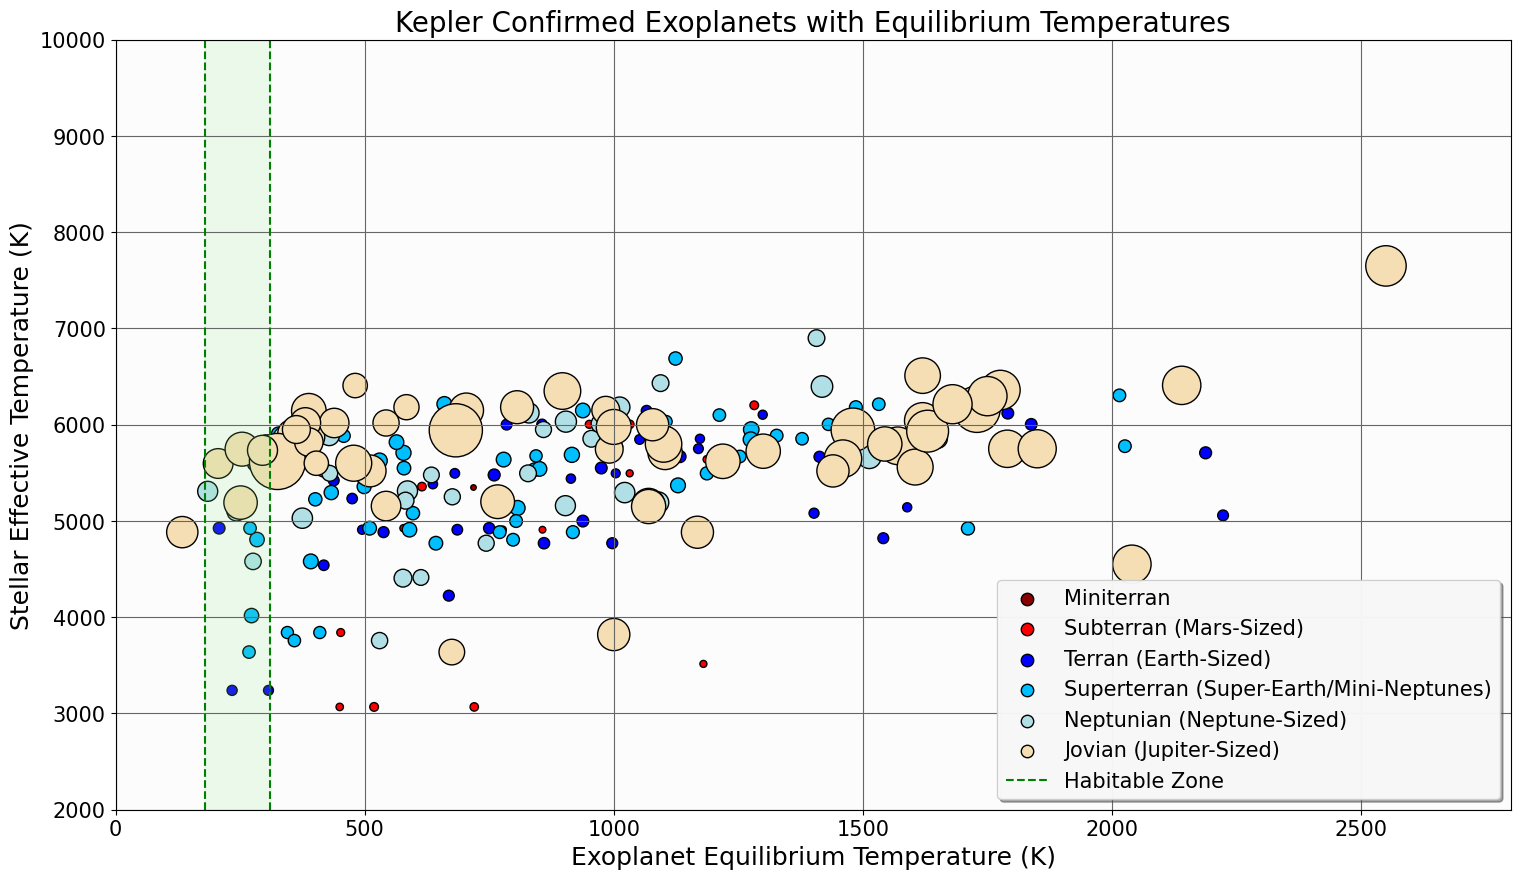

In [318]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(0, 2800)
ax.set_ylim(2000, 10000)
ax.grid(color='0.4')
ax.set_title('Kepler Confirmed Exoplanets with Equilibrium Temperatures')
ax.title.set_fontsize(20)
ax.set_xlabel('Exoplanet Equilibrium Temperature (K)')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Stellar Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                     exoplanets_data=exoplanets_data,
                     x_field='pl_eqt',
                     y_field='st_teff',
                     size_field='pl_rade',
                     type_field='pl_type',
                     scale_size=50,
                     edgecolors='black')

plt.vlines(x=180, ymin=2000, ymax=10000, colors='green', linestyles='dashed', label='Habitable Zone')
plt.vlines(x=310, ymin=2000, ymax=10000, colors='green', linestyles='dashed')

ax.add_patch(plt.Rectangle(xy=(180, 0),
                           width=130,
                           height=10000,
                           color='lightgreen',
                           alpha=0.15))

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.95)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [319]:
exoplanets_data['pl_insol'].describe()

count       157.000000
mean       3133.656433
std       34777.595821
min           0.210000
25%           5.950000
50%          51.320000
75%         315.000000
max      436000.000000
Name: pl_insol, dtype: float64

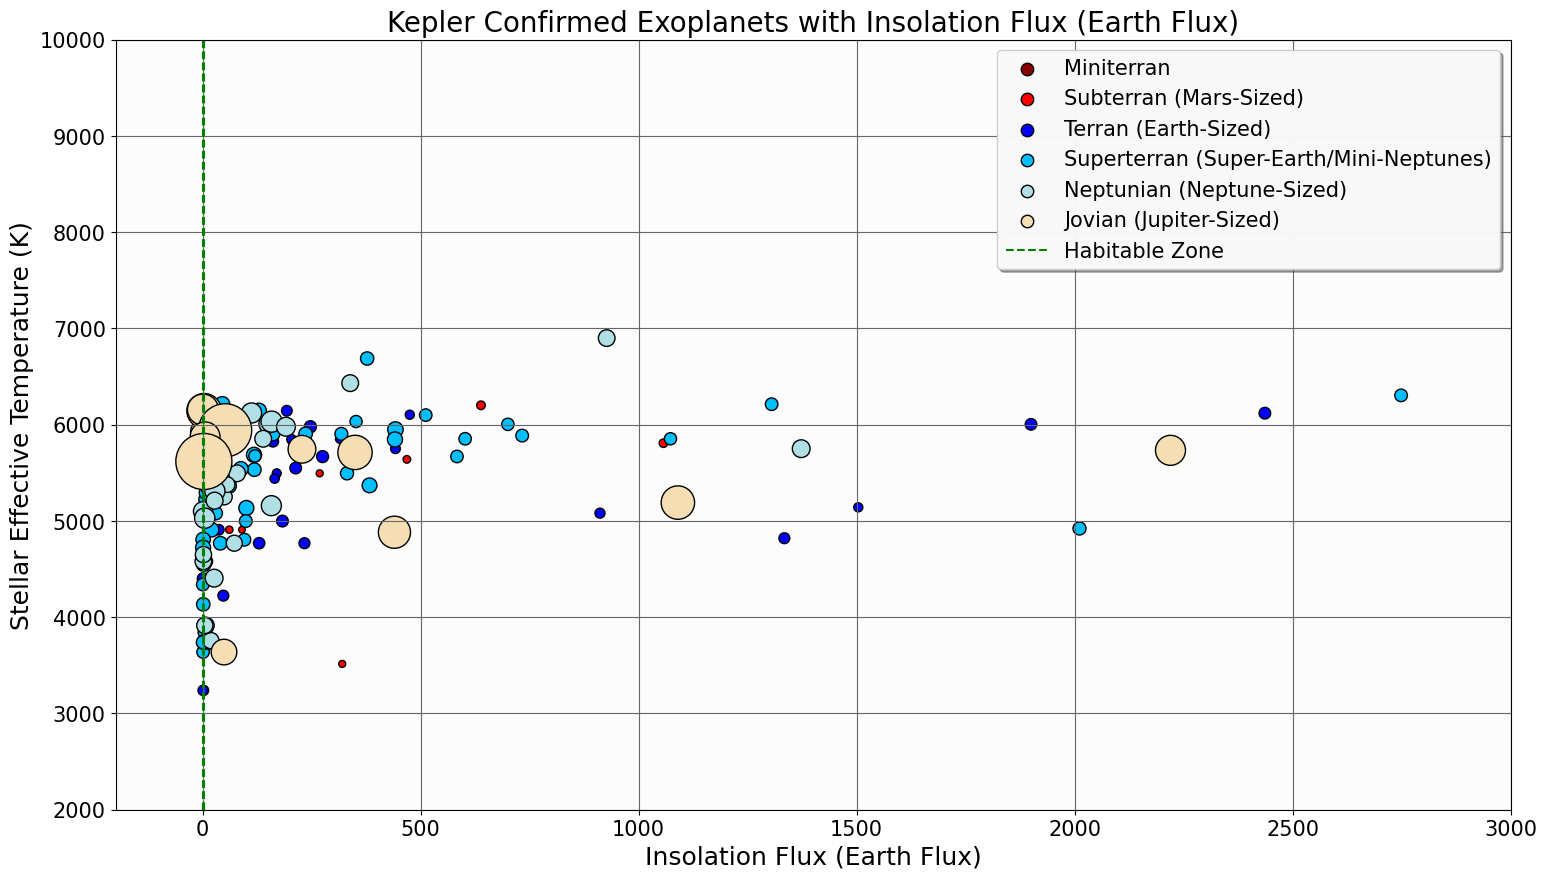

In [320]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(-200, 3000)
ax.set_ylim(2000, 10000)
ax.grid(color='0.4')
ax.set_title('Kepler Confirmed Exoplanets with Insolation Flux (Earth Flux)')
ax.title.set_fontsize(20)
ax.set_xlabel('Insolation Flux (Earth Flux)')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Stellar Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                     exoplanets_data=exoplanets_data,
                     x_field='pl_insol',
                     y_field='st_teff',
                     size_field='pl_rade',
                     type_field='pl_type',
                     scale_size=50,
                     edgecolors='black')

plt.vlines(x=0.25, ymin=2000, ymax=10000, colors='green', linestyles='dashed', label='Habitable Zone')
plt.vlines(x=2.2, ymin=2000, ymax=10000, colors='green', linestyles='dashed')

ax.add_patch(plt.Rectangle(xy=(0.25, 0),
                           width=1.95,
                           height=10000,
                           color='lightgreen',
                           alpha=0.15))

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.96)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

In [321]:
exoplanets_data['pl_insol_log'] = np.log10(exoplanets_data['pl_insol'])
exoplanets_data['pl_insol_log'].describe()

count    157.000000
mean       1.666561
std        1.105650
min       -0.677781
25%        0.774517
50%        1.710287
75%        2.498311
max        5.639486
Name: pl_insol_log, dtype: float64

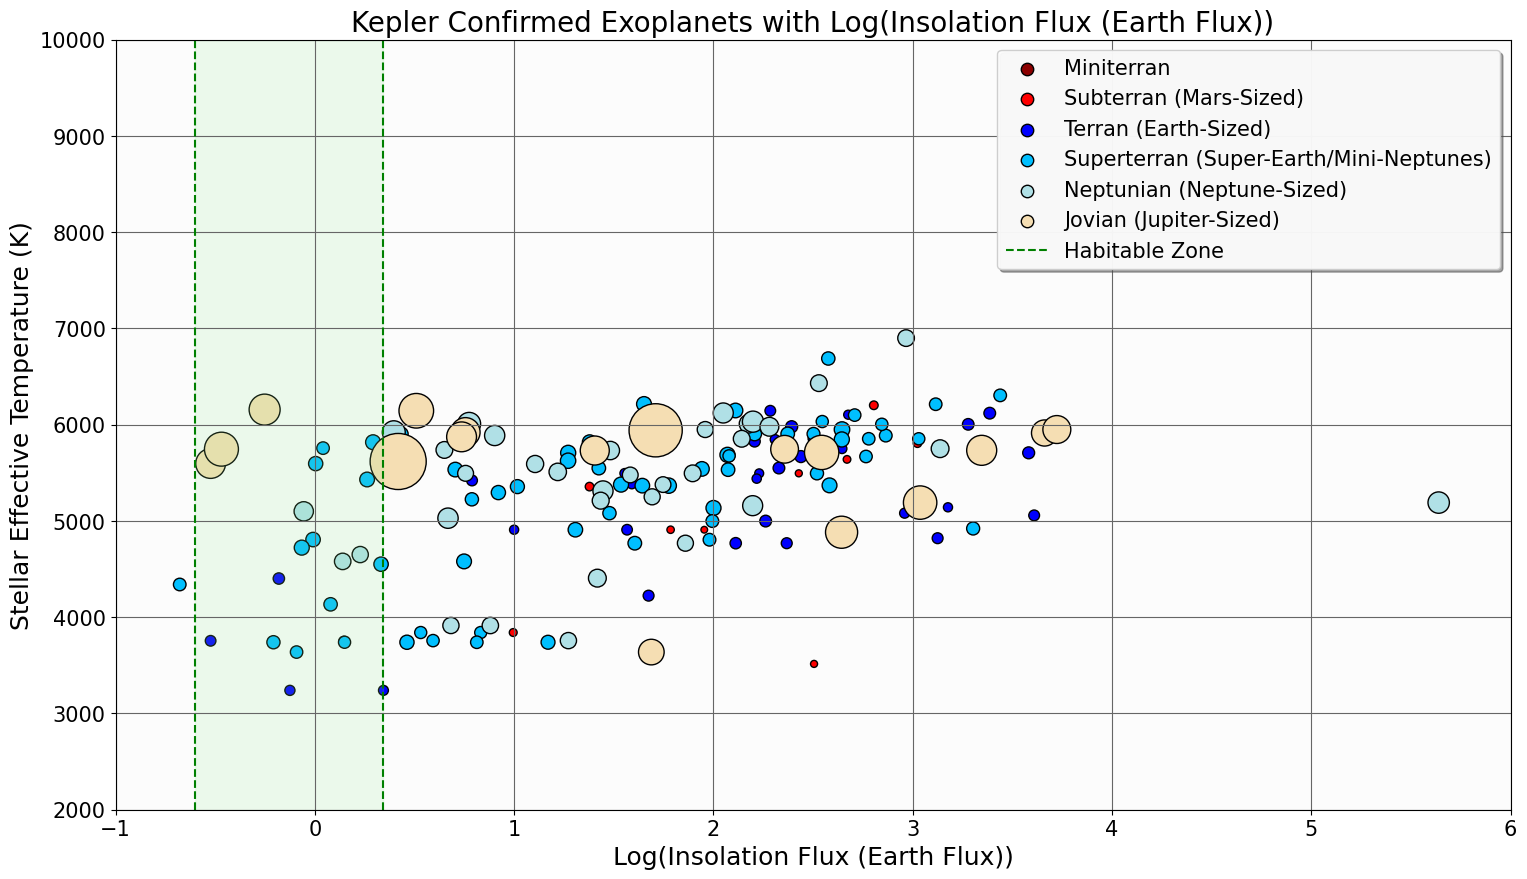

In [322]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, facecolor='0.99')

ax.set_xlim(-1, 6)
ax.set_ylim(2000, 10000)
ax.grid(color='0.4')
ax.set_title('Kepler Confirmed Exoplanets with Log(Insolation Flux (Earth Flux))')
ax.title.set_fontsize(20)
ax.set_xlabel('Log(Insolation Flux (Earth Flux))')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Stellar Effective Temperature (K)')
ax.yaxis.label.set_fontsize(18)

plot_exoplanets_with_size(ax=ax,
                     exoplanets_data=exoplanets_data,
                     x_field='pl_insol_log',
                     y_field='st_teff',
                     size_field='pl_rade',
                     type_field='pl_type',
                     scale_size=50,
                     edgecolors='black')

plt.vlines(x=np.log10(0.25), ymin=2000, ymax=10000, colors='green', linestyles='dashed', label='Habitable Zone')
plt.vlines(x=np.log10(2.2), ymin=2000, ymax=10000, colors='green', linestyles='dashed')

ax.add_patch(plt.Rectangle(xy=(np.log10(0.25), 0),
                           width=np.log10(2.2) - np.log10(0.25),
                           height=10000,
                           color='lightgreen',
                           alpha=0.15))

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.96)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')